<div style="border:5px solid black; padding:5px;">
    <h1>ETAPE 1     -Compréhension des Données</h1>
    <p>Etudes Préliminaires </p>
    </div>


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

warnings.filterwarnings('ignore')


---
## Téléchargement des données

In [65]:
def lire_csv(PATH, delimiter=',', encoding='utf-8'):
      try:
        data = pd.read_csv(PATH, delimiter=delimiter, encoding=encoding)
        print(f"Fichier '{PATH}' lu avec succès.")
        return data  
      except Exception as e:
        print(f"Erreur lors de la lecture du fichier '{PATH}': {e}")

chemin_fichier = "Data.csv"
# Call the function and store the result in 'data'
data = lire_csv(chemin_fichier)



Fichier 'Data.csv' lu avec succès.


-----

# travaille a faire de base
* faire une copie de mon data
* determiner la variable Target : Diagnosis ( M/B)
* determiner le nombres de colonnes : 33
* determiner le nombres des ligne : 569
* determiner le type des variables :float64 = 31 /
int6 =   /
obje =   1
*determiner les  veriables manquantes0
* suppression de colonne 'ID' aucun interret sur mon jeu des données :


In [66]:
df = data.copy()

In [67]:
df.shape

(569, 33)

In [68]:
df.dtypes.value_counts()

float64    31
int64       1
object      1
Name: count, dtype: int64

In [69]:
data.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


------
## Nettoyage des Données

In [70]:
# nom de feature comme list
col = df.columns    # .columns  nous donne le nom de colonne sur Le jeux de Données
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [71]:
# Vérifier les valeurs nulles dans chaque colonne
null_values = df.isnull().sum()
print(null_values)


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<Axes: >

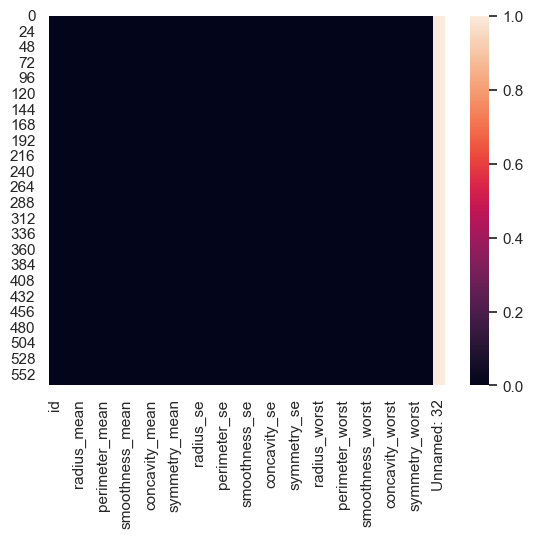

In [72]:
#afficher les valeur null dans un heatmap
sns.heatmap(df.isna())

In [73]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


---


# Examen de la colonne Target: Diagnosis

In [74]:
label = df.diagnosis 
list = ['Unnamed: 32','diagnosis','id']
features = df.drop(list,axis = 1 )

In [75]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [76]:
label.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

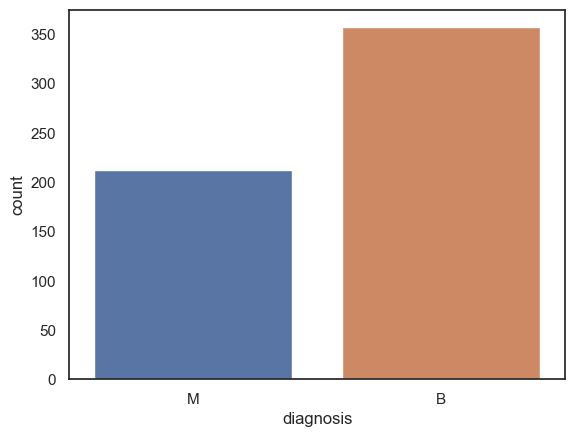

In [77]:
ax = sns.countplot(data=label, x=label)

-----

# Analyse Features (Variables) + Graphique

In [78]:
#label =y ====> TARGET 
#features = x ===> LES VARIABLES 
#dF : rassemble tout les donnees

In [79]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [80]:
label.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [81]:
 df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [82]:
# pour afficher le tout :le min ,max ,Q1,Q3,moyenne
# Calcul des statistiques descriptives
stats_descriptives = features.describe()

# Affichage des statistiques descriptives
print("Statistiques descriptives :")
print(stats_descriptives)


Statistiques descriptives :
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000      

In [83]:
# Exportez les statistiques descriptives dans un fichier Excel
#  enregistrer le fichier Excel 
chemin_fichier_excel = "C:/Users/tarak/Paris-8/Technique_apprentissage/Projet/statistiques_descriptives.xlsx"
stats_descriptives.to_excel(chemin_fichier_excel)


In [84]:
# 'feature' est mon  DataFrame contenant les données (les variables)
# Calcul de la moyenne
#moyenne = features.mean()
# Calcul de la médiane
#median = features.median()
# Affichage des résultats
#print("Moyenne des variables :")
#print(moyenne)
#print("Médiane des variables :")
#print(median)

--------

# Variance et Ecart_Type

In [85]:
# Calcul de la variance
variance = features.var()
# Calcul de l'écart-type
ecart_type = features.std()
# Affichage des résultats
print("Variance des variables :")
print(variance)
print("\nÉcart-type des variables :")
print(ecart_type)


Variance des variables :
radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst                 32416

Dispersion Variable entre les Caractéristiques : Les valeurs de variance et d'écart type varient considérablement d'une caractéristique à l'autre.

Cela indique une dispersion très différente des valeurs autour de leur moyenne pour chaque caractéristique. 

Par exemple, des caractéristiques telles que area_mean et area_worst présentent des variances et des écarts types beaucoup plus élevés que des caractéristiques telles que smoothness_mean ou fractal_dimension_mean. 

Cela suggère que les tailles des aires présentent une variabilité beaucoup plus grande que les mesures de texture ou de douceur.

Influence Potentielle sur les Modèles de Machine Learning : Les caractéristiques avec une grande variance et un grand écart type peuvent avoir une influence plus significative sur certains modèles de machine learning, en particulier ceux qui ne normalisent pas automatiquement les données (comme les arbres de décision). Cependant, pour des modèles sensibles à l'échelle des caractéristiques, comme la régression linéaire ou les SVM, ces grandes différences dans la dispersion peuvent entraîner des problèmes de convergence ou des performances médiocres si les données ne sont pas standardisées.

Importance de la Standardisation : La grande variabilité dans les variances et les écarts types souligne l'importance de la standardisation des caractéristiques, surtout lorsque vous travaillez avec des algorithmes qui sont sensibles à l'échelle des données. La standardisation transforme les données pour que chaque caractéristique ait une moyenne de 0 et un écart type de 1, réduisant les disparités de dispersion et permettant une comparaison équitable entre les caractéristiques.

Identification des Caractéristiques Significatives : Les caractéristiques avec des variances et des écarts types très faibles peuvent ne pas apporter beaucoup d'information utile pour la séparation des classes ou la prédiction, car elles indiquent peu de variation dans les données. Cependant, cela ne signifie pas automatiquement que ces caractéristiques doivent être exclues de l'analyse, car leur importance peut dépendre du contexte spécifique et de l'interaction avec d'autres variables.

Analyse Plus Approfondie : Pour certaines applications, il pourrait être utile d'examiner plus en détail pourquoi certaines caractéristiques ont une dispersion beaucoup plus élevée. Cela pourrait être dû à la nature des données, à des erreurs de mesure, ou à la présence de valeurs aberrantes. Une analyse plus approfondie, y compris l'examen des distributions et la recherche de valeurs aberrantes, peut fournir des insights supplémentaires.

Pour conclure :

ces résultats mettent en évidence l'importance de comprendre la distribution et la dispersion de vos données avant d'appliquer des techniques de modélisation statistique ou de machine learning. La préparation appropriée des données, y compris la standardisation et potentiellement la suppression des caractéristiques avec peu de variabilité, peut améliorer la qualité de vos analyses et la performance de vos modèles.


In [86]:
# Fonction pour standardiser les données
def standarliser(data):
    # Calculer la moyenne et l'écart-type pour chaque colonne
    means = data.mean()
    stds = data.std()

    # Appliquer la standardisation: (x - moyenne) / écart-type
    data_standarliser = (data - means) / stds
    
    return data_standarliser

# Appliquer la fonction de standardisation
features_std = standarliser(features)

# Afficher les premières lignes des données standardisées
features_std.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [87]:
#label =y
#features = x
#data : rassemble tout les donnees
#featyres_std

-------

# Répresentation des Features 

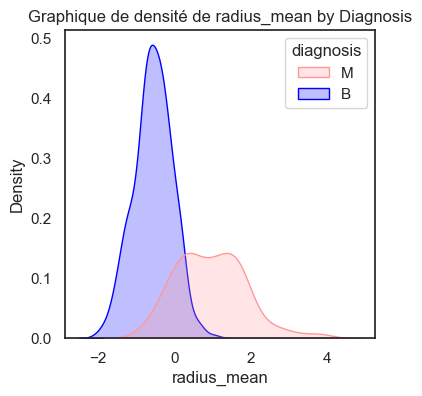

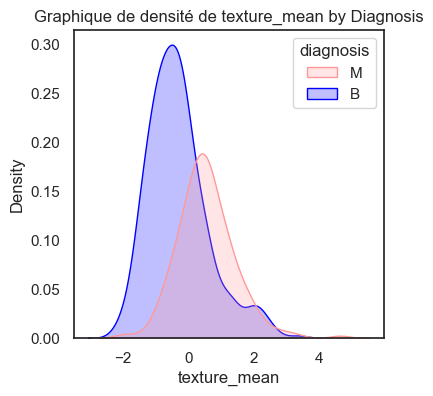

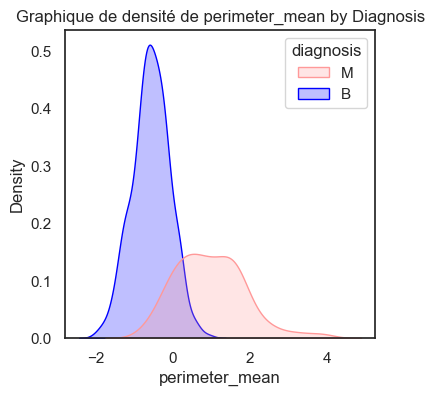

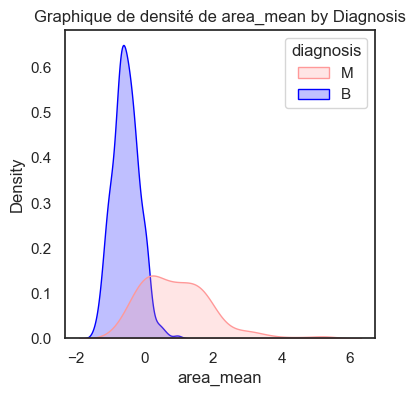

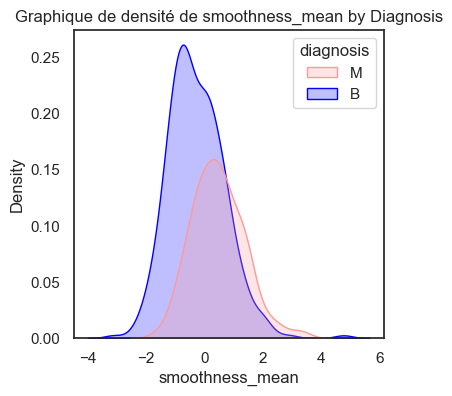

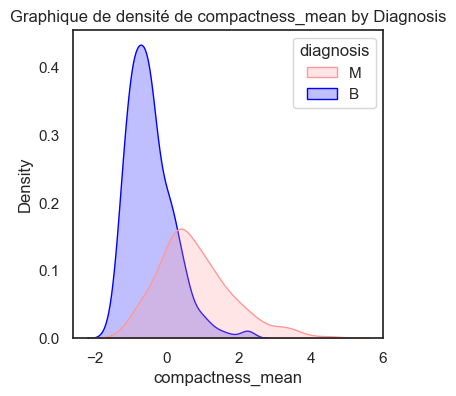

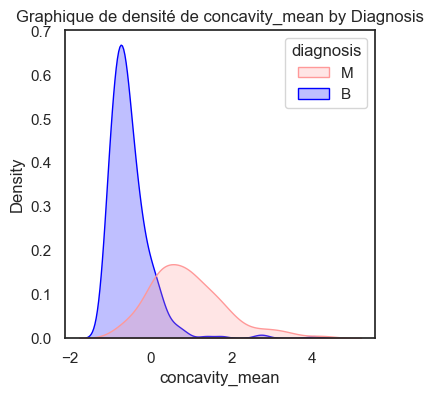

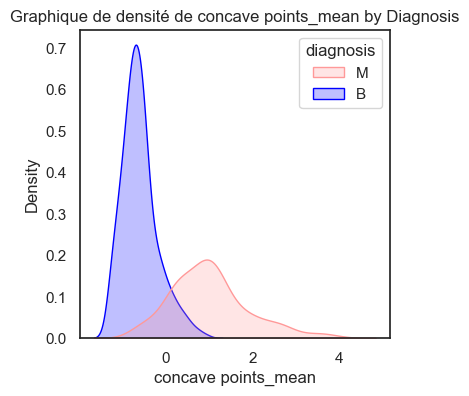

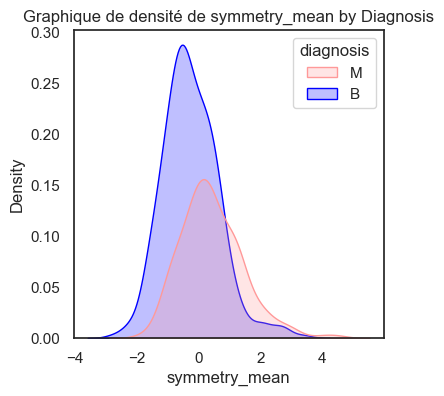

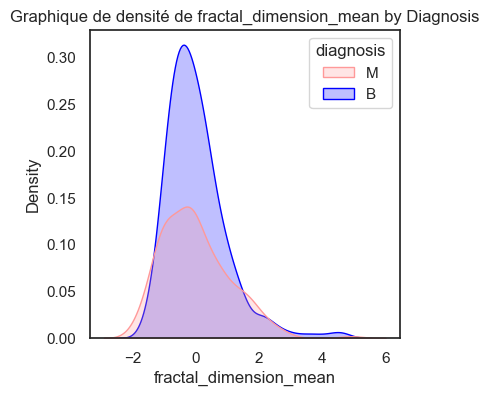

In [88]:
# Concaténation des labels et des features standardisées
data_std = pd.concat([label, features_std.iloc[:,0:10]], axis=1)
# Palette de couleurs personnalisée
palette_contrast = {"M": "#ff9999", "B": "blue"}
# Sélectionner les caractéristiques à visualiser
features = data_std.columns[1:]  # Ignorer la colonne du label dans cette sélection
# Création d'un Density Plot pour chaque caractéristique
for feature in features:
    plt.figure(figsize=(4, 4))
    sns.kdeplot(data=data_std, x=feature, hue="diagnosis", palette=palette_contrast, fill=True)
    plt.title(f"Graphique de densité de {feature} by Diagnosis")
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


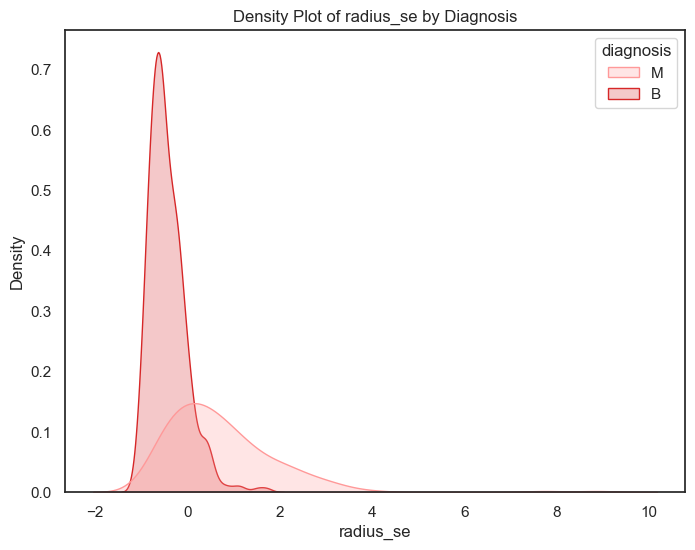

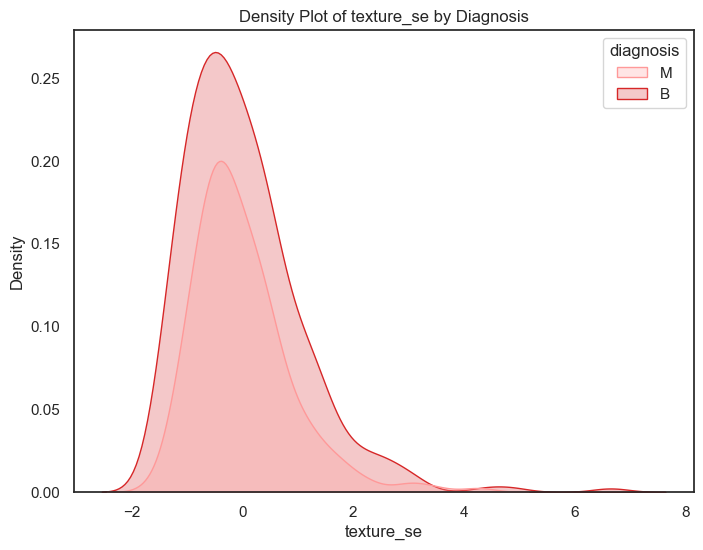

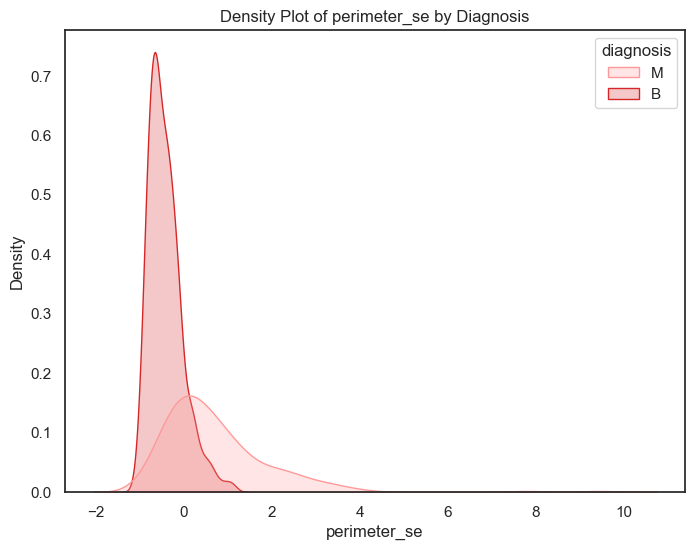

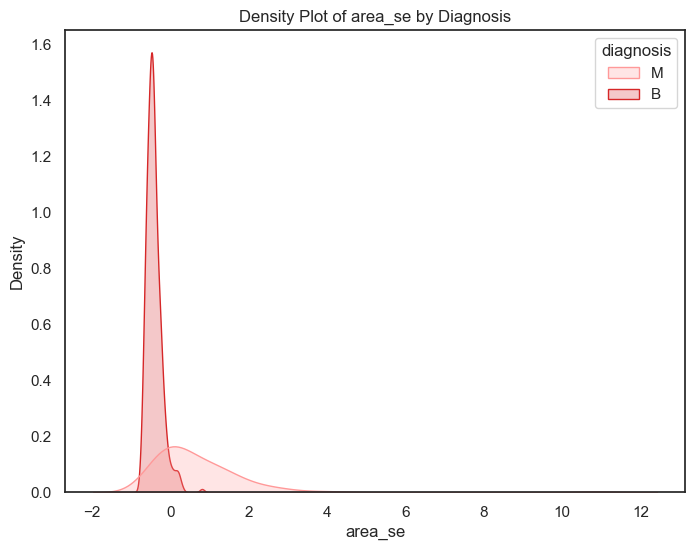

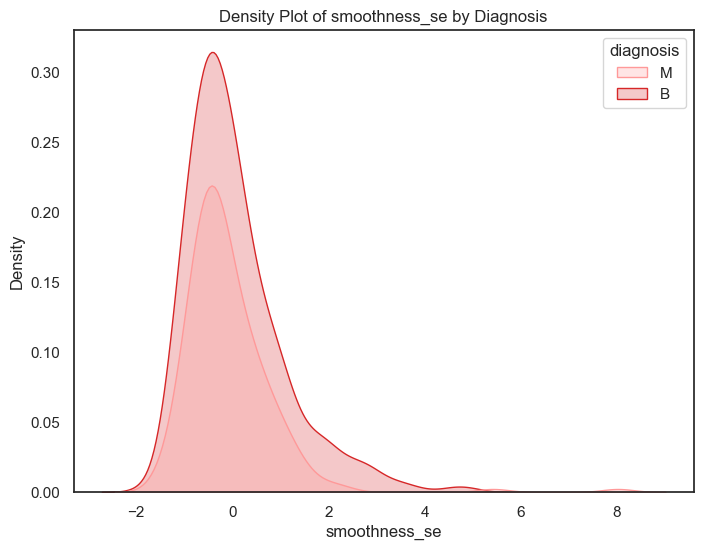

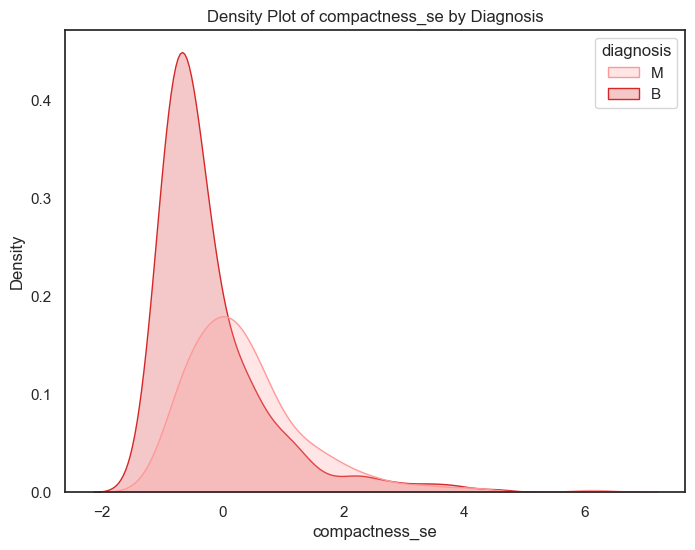

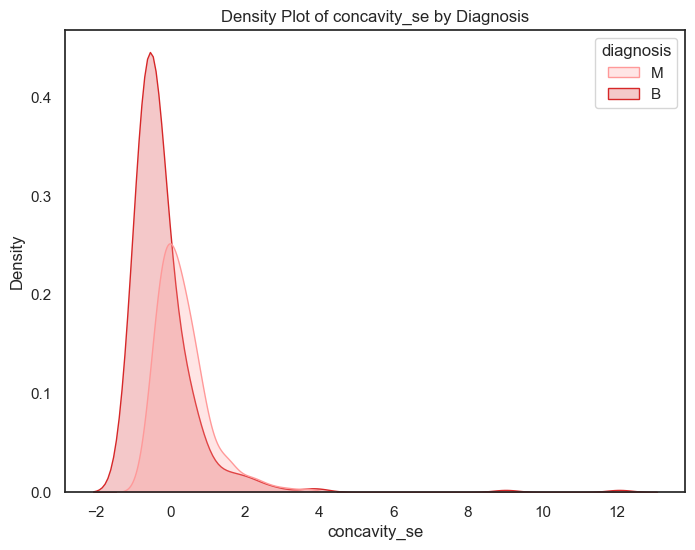

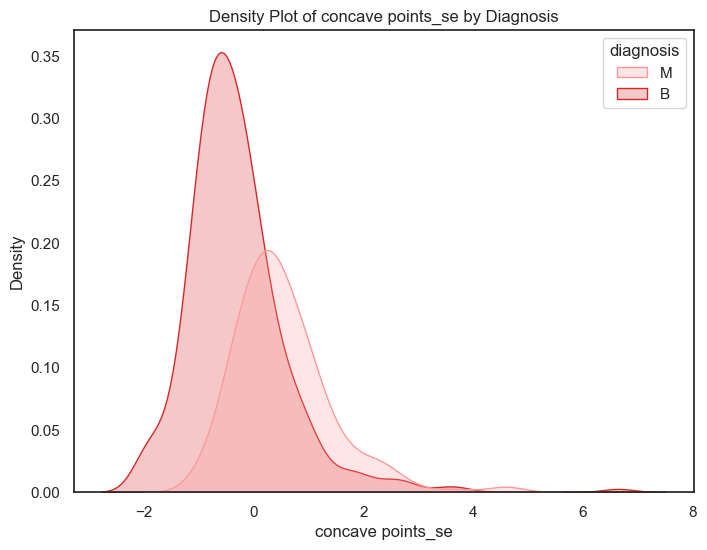

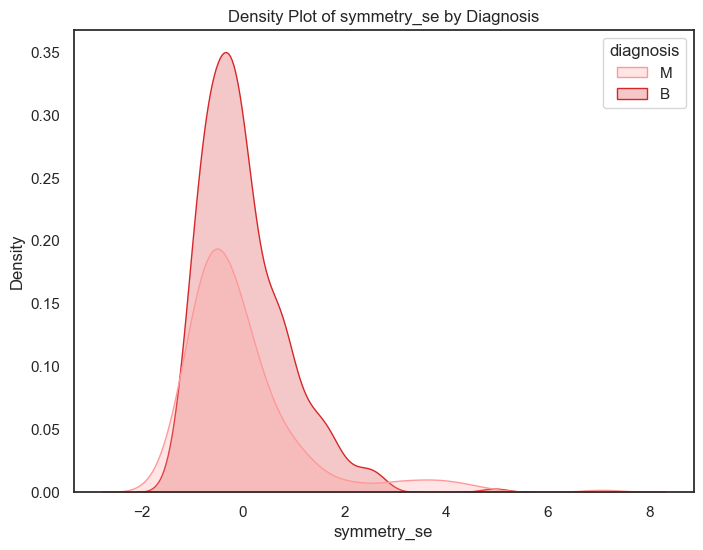

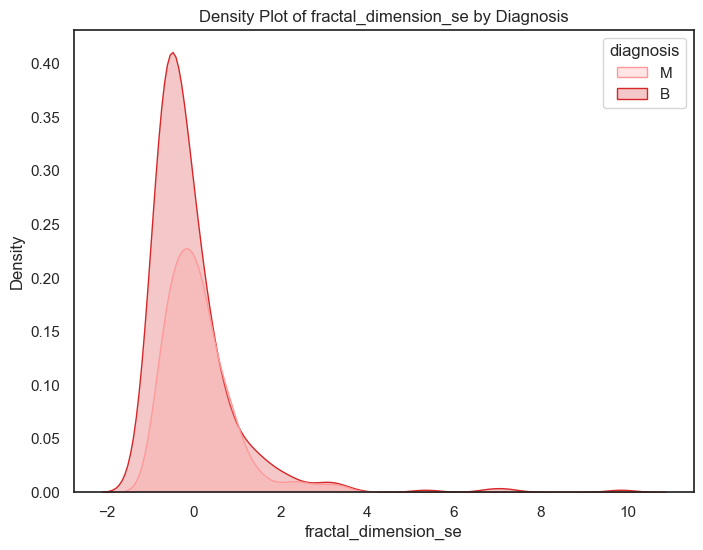

In [89]:
# Concaténation des labels et des features standardisées
data_std = pd.concat([label, features_std.iloc[:,10:20]], axis=1)
# Palette de couleurs personnalisée
palette_contrast = {"M": "#ff9999", "B": "#d62728"}
# Sélectionner les caractéristiques à visualiser
features = data_std.columns[1:]  # Ignorer la colonne du label dans cette sélection
# Création d'un Density Plot pour chaque caractéristique
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=data_std, x=feature, hue="diagnosis", palette=palette_contrast, fill=True)
    plt.title(f"Density Plot of {feature} by Diagnosis")
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


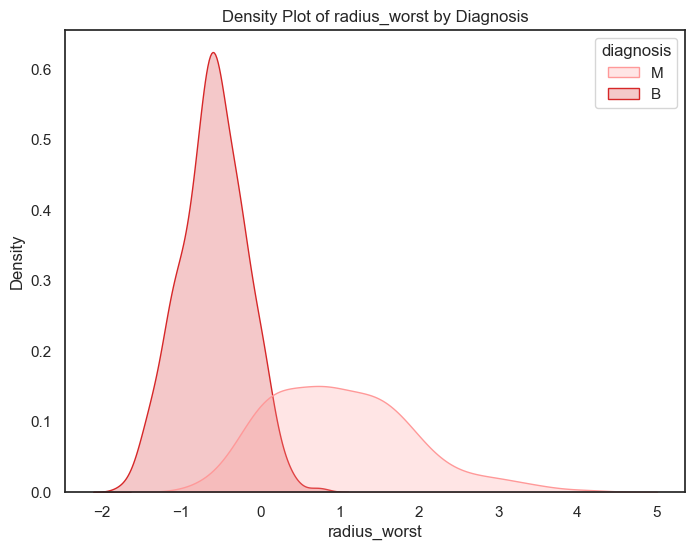

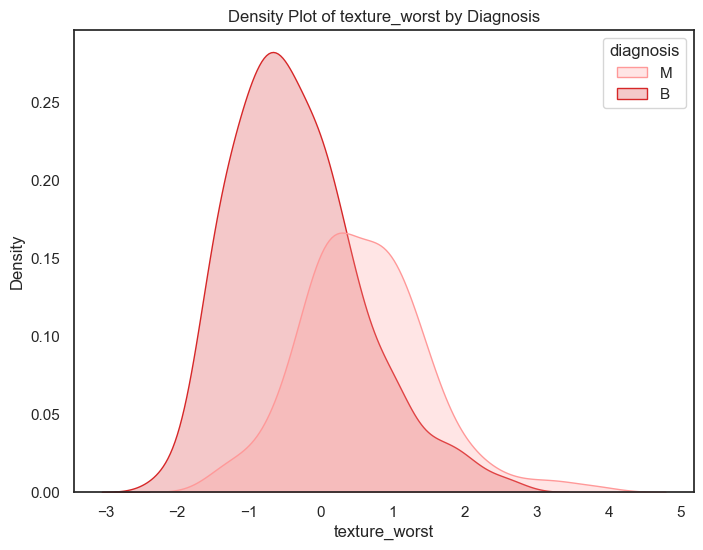

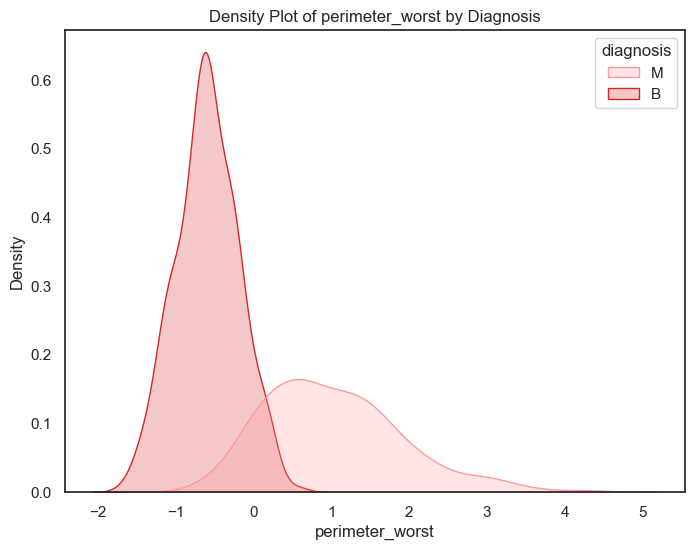

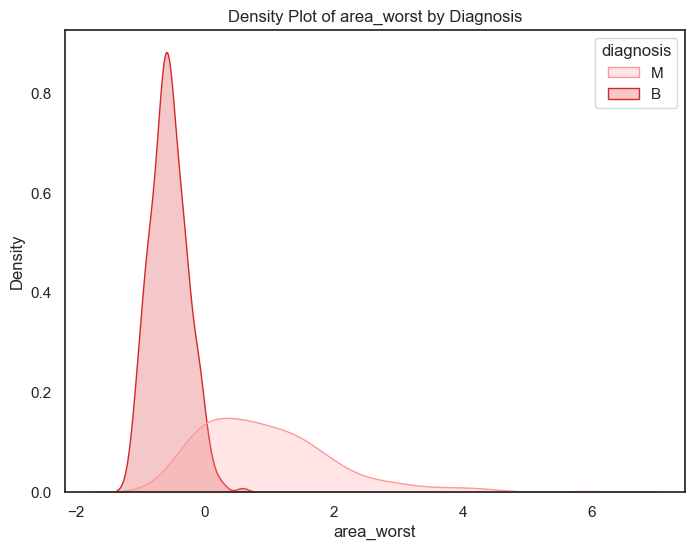

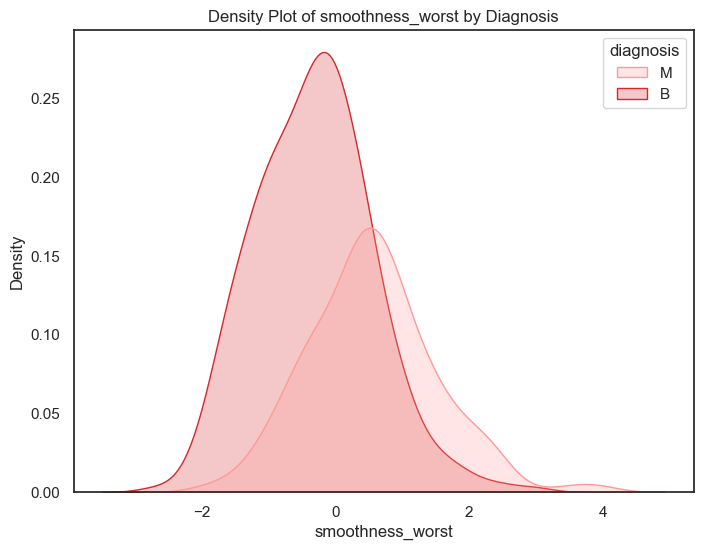

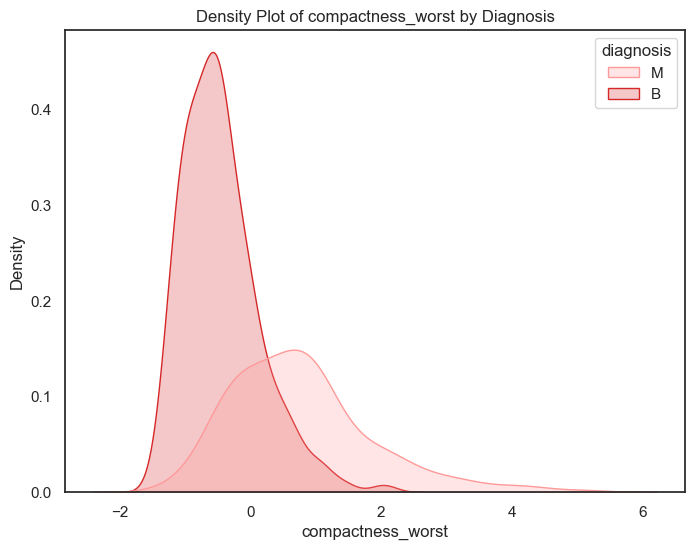

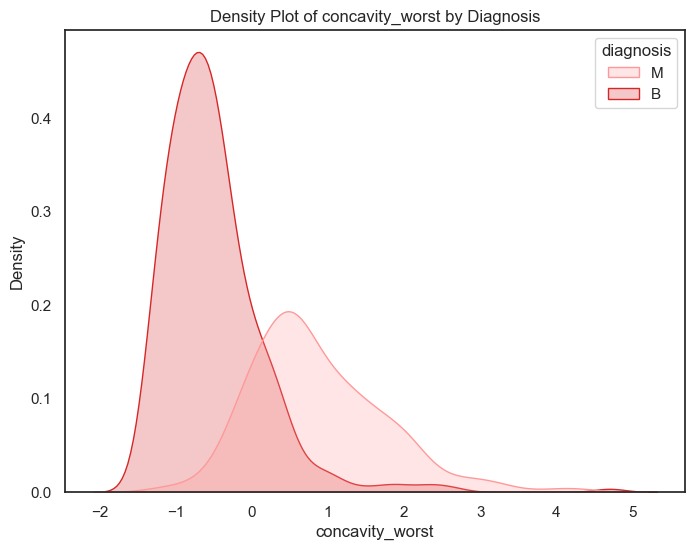

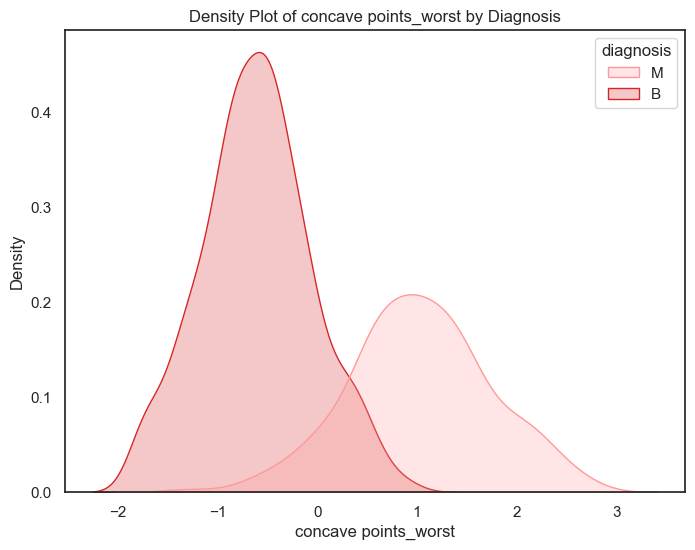

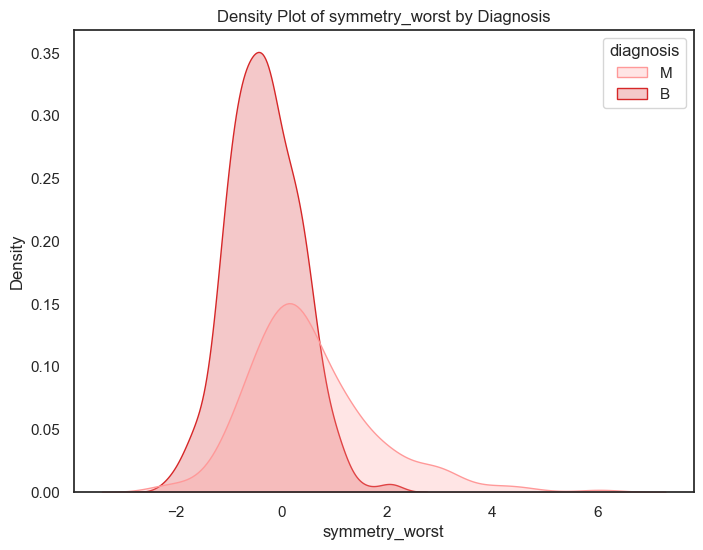

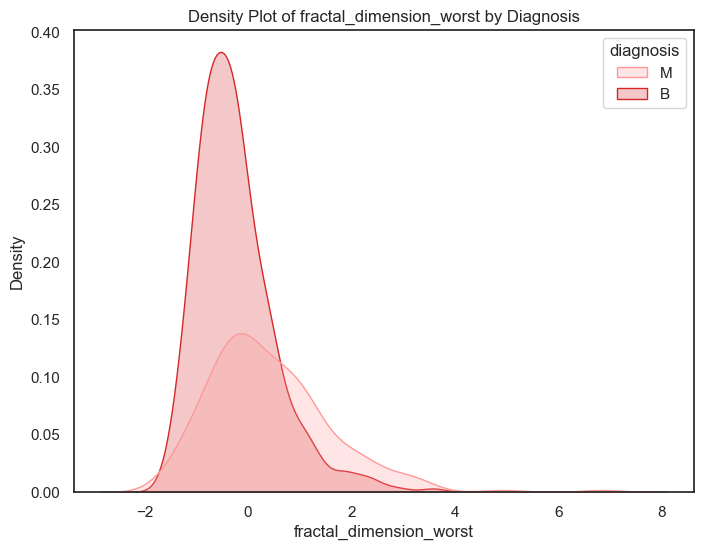

In [90]:
# Concaténation des labels et des features standardisées
data_std = pd.concat([label, features_std.iloc[:,20:30]], axis=1)
# Palette de couleurs personnalisée
palette_contrast = {"M": "#ff9999", "B": "#d62728"}
# Sélectionner les caractéristiques à visualiser
features = data_std.columns[1:]  # Ignorer la colonne du label dans cette sélection
# Création d'un Density Plot pour chaque caractéristique
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=data_std, x=feature, hue="diagnosis", palette=palette_contrast, fill=True)
    plt.title(f"Density Plot of {feature} by Diagnosis")
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


In [91]:
data_std.head()

,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,M,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,M,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,M,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,M,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


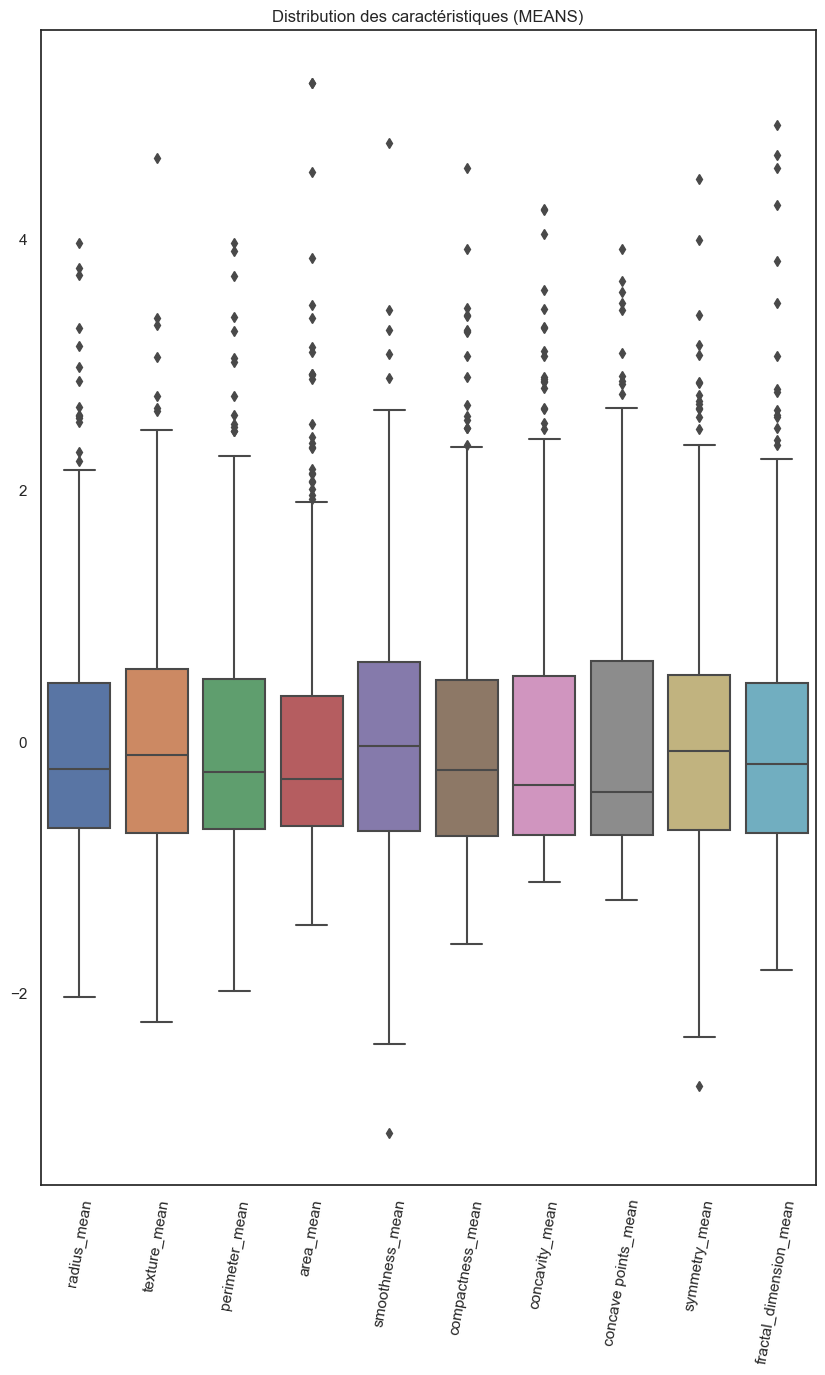

In [92]:
data_std = pd.concat([label, features_std.iloc[:,0:10]], axis=1)
plt.figure(figsize=(10, 15))  # taille de la figure
sns.boxplot(data=data_std.drop('diagnosis', axis=1))  # Exclut la colonne 'diagnosis' des données à tracer
plt.title('Distribution des caractéristiques (MEANS)')  # titre
plt.xticks(rotation=80)  # étiquettes de l'axe x 
plt.show()

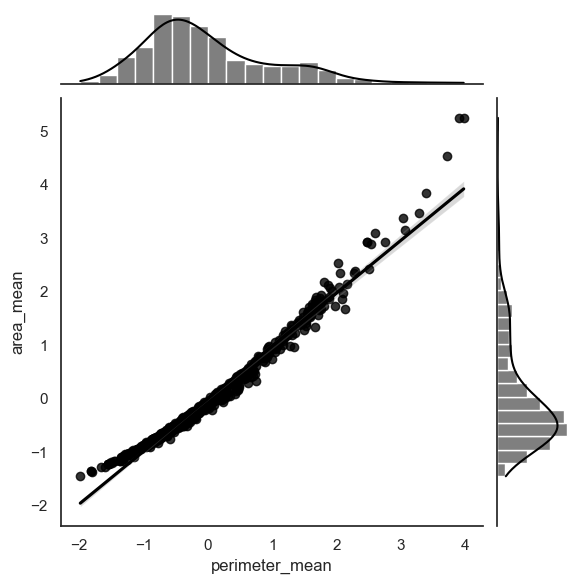

In [93]:
sns.jointplot(x='perimeter_mean', y='area_mean', data=features_std, kind="reg", color="black")

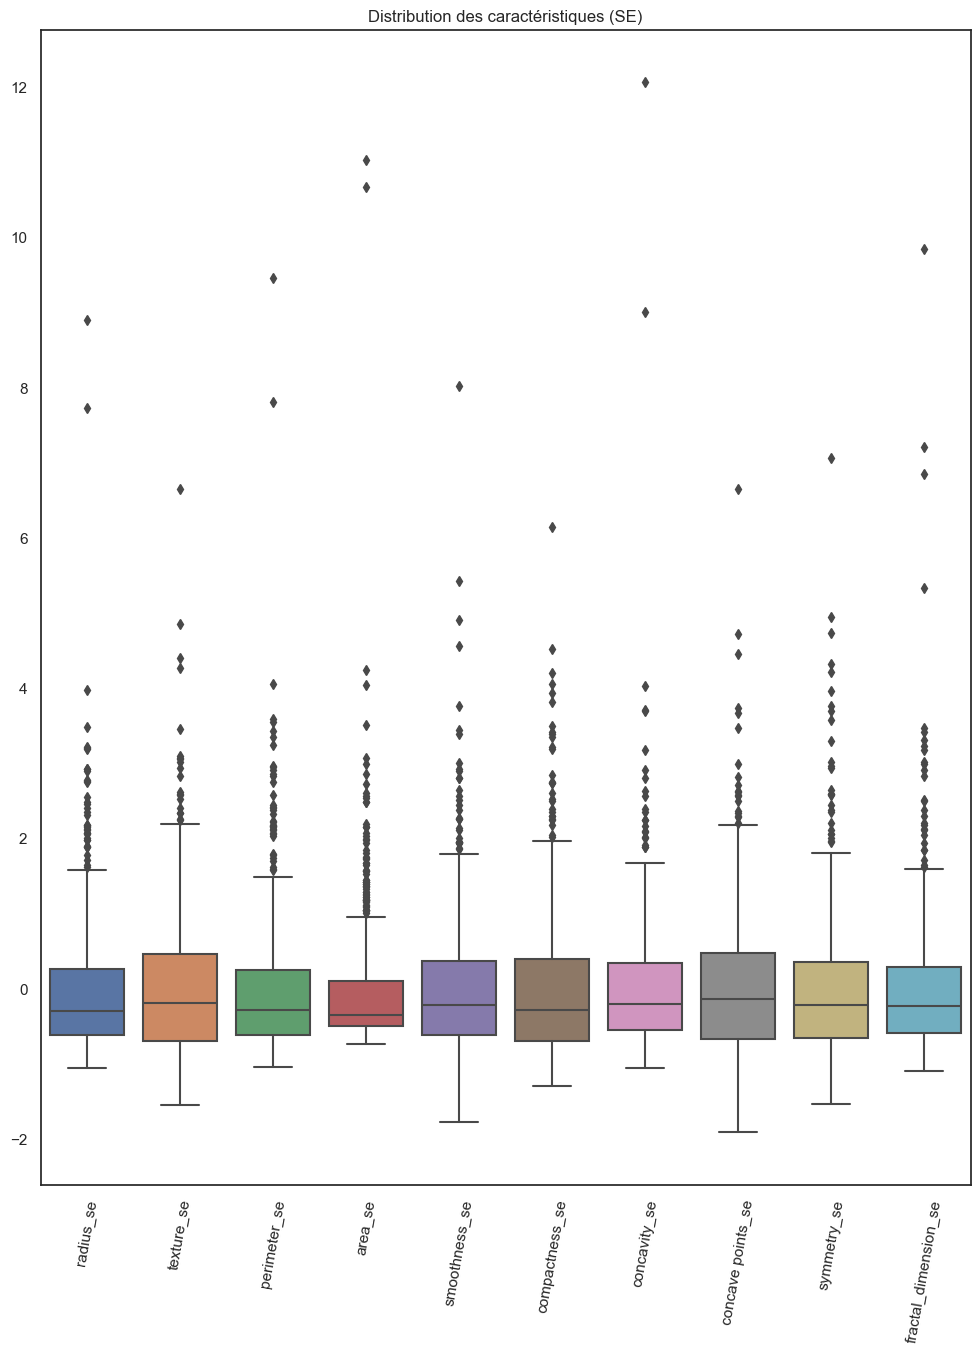

In [94]:
data_std = pd.concat([label, features_std.iloc[:,10:20]], axis=1)
plt.figure(figsize=(12, 15)) 
sns.boxplot(data=data_std.drop('diagnosis', axis=1))  
plt.title('Distribution des caractéristiques (SE)')  
plt.xticks(rotation=80) 
plt.show()

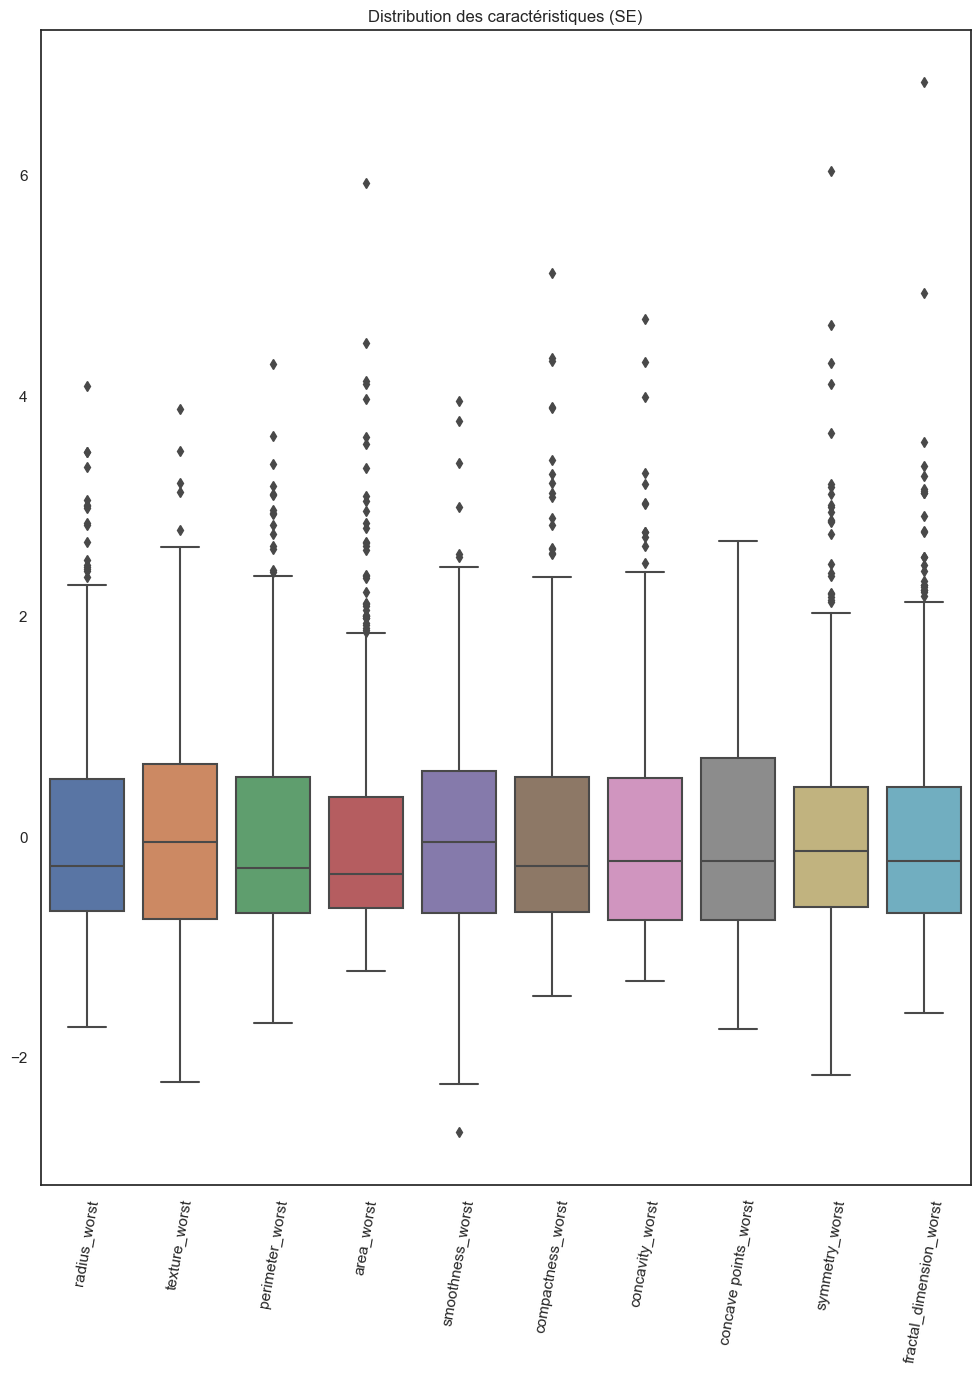

In [95]:
data_std = pd.concat([label, features_std.iloc[:,20:30]], axis=1)
plt.figure(figsize=(12, 15)) 
sns.boxplot(data=data_std.drop('diagnosis', axis=1))  
plt.title('Distribution des caractéristiques (SE)')  
plt.xticks(rotation=80) 
plt.show()

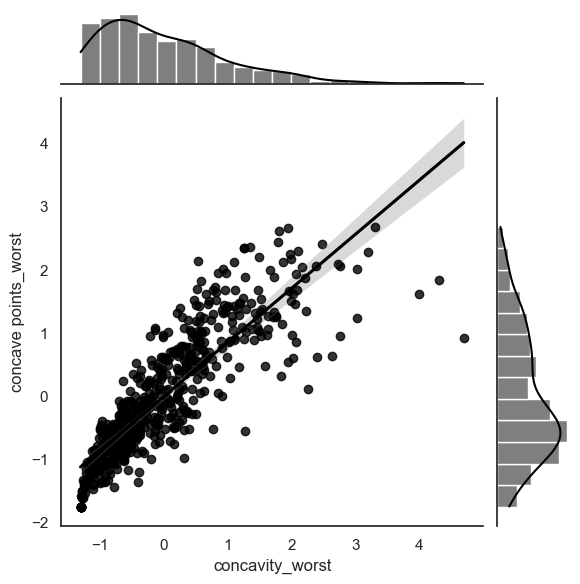

In [96]:
sns.jointplot(x='concavity_worst', y='concave points_worst', data=features_std, kind="reg", color="black")


Conclusion : on peut supprimer  deux variable qui sont fortement corelé (presque pareil): parmi ces 4 

concavity_worst et concave points_worst
perimeter_mean et area_mean

In [97]:
#label =y
#features = x
#data : rassemble tout les donnees
#featyres_std

In [98]:
import time

Temps d'exécution: 4.238293886184692 secondes


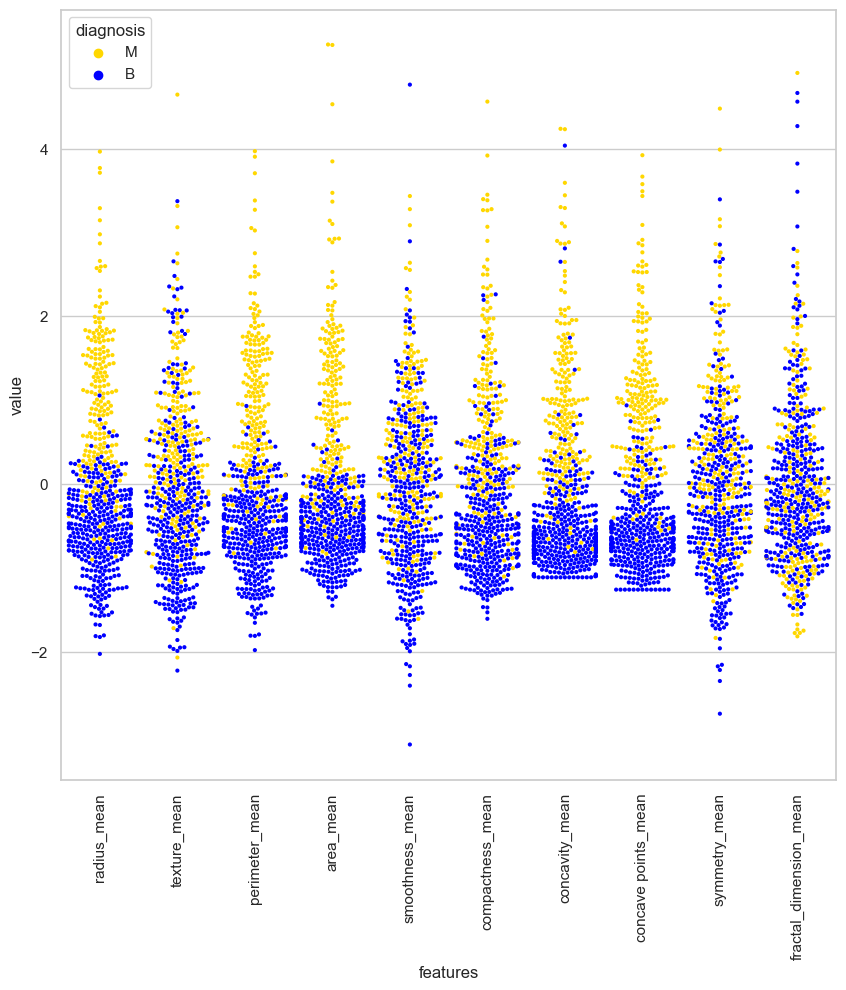

In [99]:
sns.set(style="whitegrid", palette="muted")
data2 = pd.concat([label, features_std.iloc[:, 0:10]], axis=1)
data2 = pd.melt(data2, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
#une palette de couleurs personnalisée
palette_custom = {"M": "gold", "B": "blue"}  
# Utilisation de la palette personnalisée dans le swarm plot
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data2, size=3, palette=palette_custom)
plt.xticks(rotation=90)
toc = time.time()
print(f"Temps d'exécution: {toc - tic} secondes")
plt.show()

Temps d'exécution: 8.304382562637329 secondes


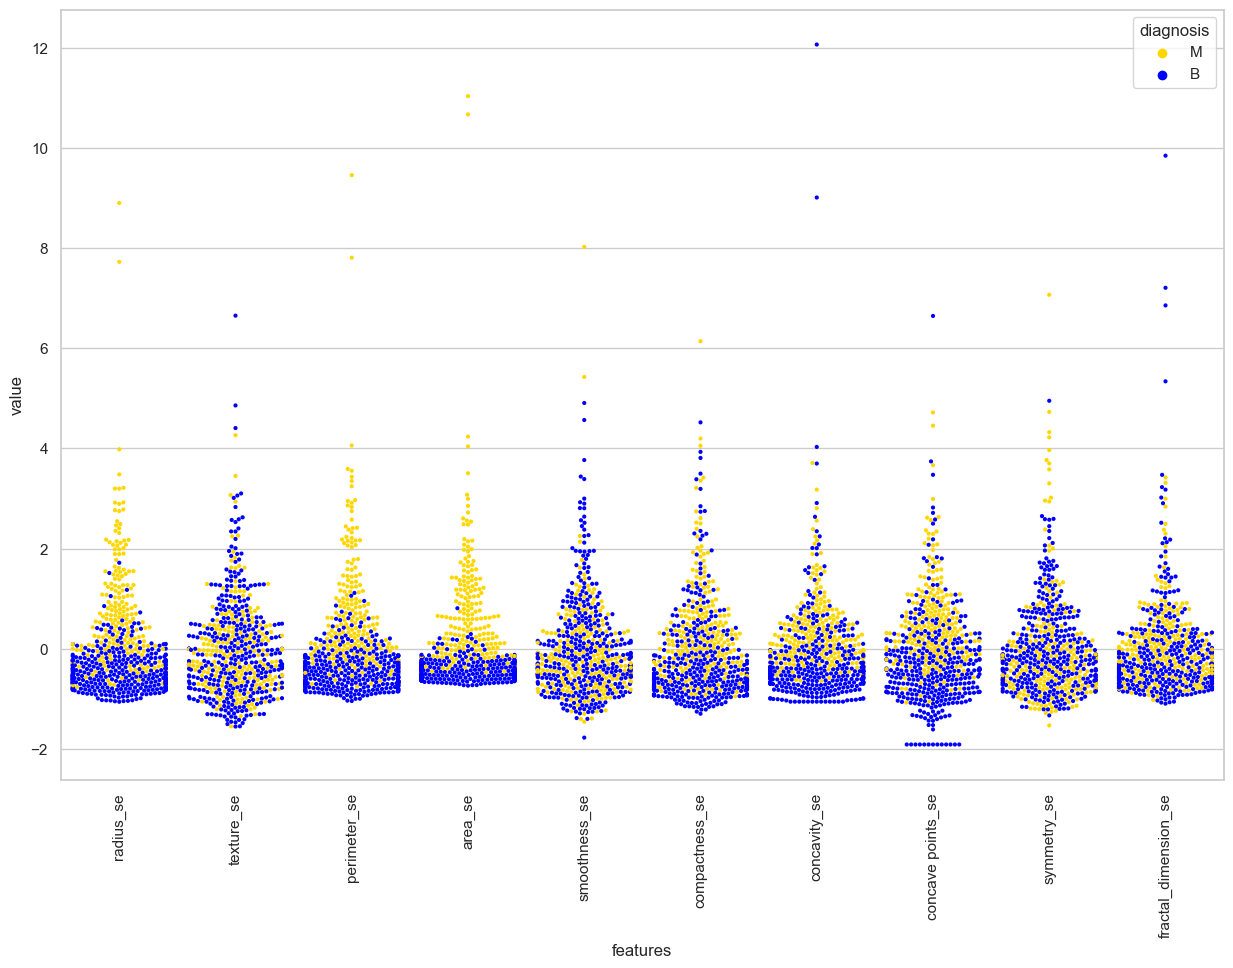

In [100]:
sns.set(style="whitegrid", palette="muted")
data2 = pd.concat([label, features_std.iloc[:, 10:20]], axis=1)
data2 = pd.melt(data2, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(15,10))
tic = time.time()
# Définition d'une palette de couleurs personnalisée
palette_custom = {"M": "gold", "B": "blue"}  # Exemple de couleurs pour M et B
# Utilisation de la palette personnalisée dans le swarm plot
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data2, size=3, palette=palette_custom)
plt.xticks(rotation=90)
toc = time.time()
print(f"Temps d'exécution: {toc - tic} secondes")
plt.show()

Temps d'exécution: 3.929971694946289 secondes


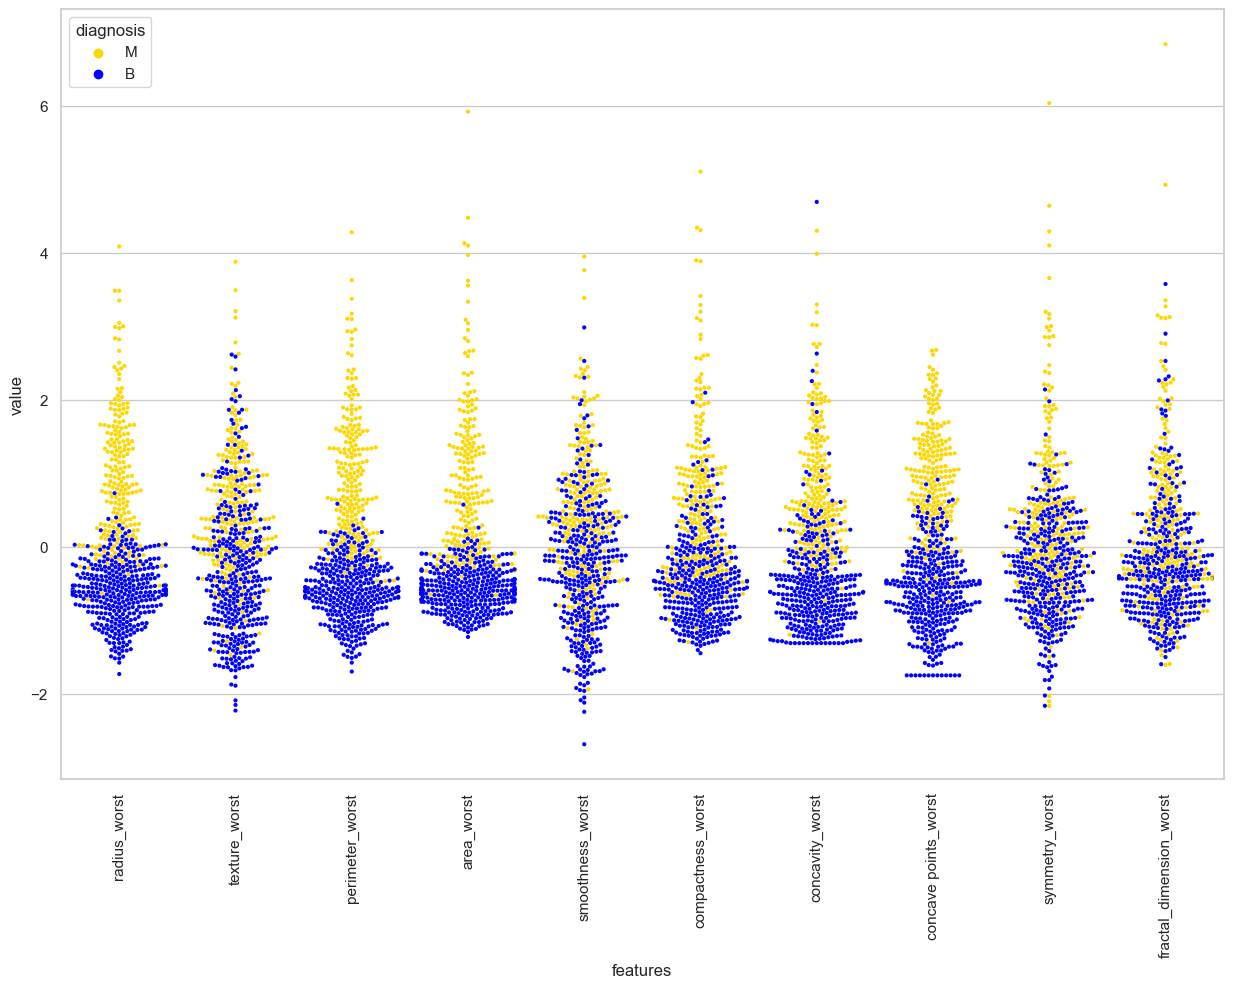

In [101]:
sns.set(style="whitegrid", palette="muted")
data2 = pd.concat([label, features_std.iloc[:, 20:30]], axis=1)
data2 = pd.melt(data2, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(15,10))
tic = time.time()
# Définition d'une palette de couleurs personnalisée
palette_custom = {"M": "gold", "B": "blue"}  # Exemple de couleurs pour M et B
# Utilisation de la palette personnalisée dans le swarm plot
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data2, size=3, palette=palette_custom)
plt.xticks(rotation=90)
toc = time.time()
print(f"Temps d'exécution: {toc - tic} secondes")
plt.show()

Ici je peux voir la variance plus clairement.

À mon avis, la zone la plus mauvaise dans le dernier essaim semble être maligne et bénigne, mais pas totalement séparées. Cependant, smoothness_se dans swarm plot 2 semble être un mélange de malin et de bénin, il est donc difficile de le classer lors de l'utilisation de cette fonctionnalité.



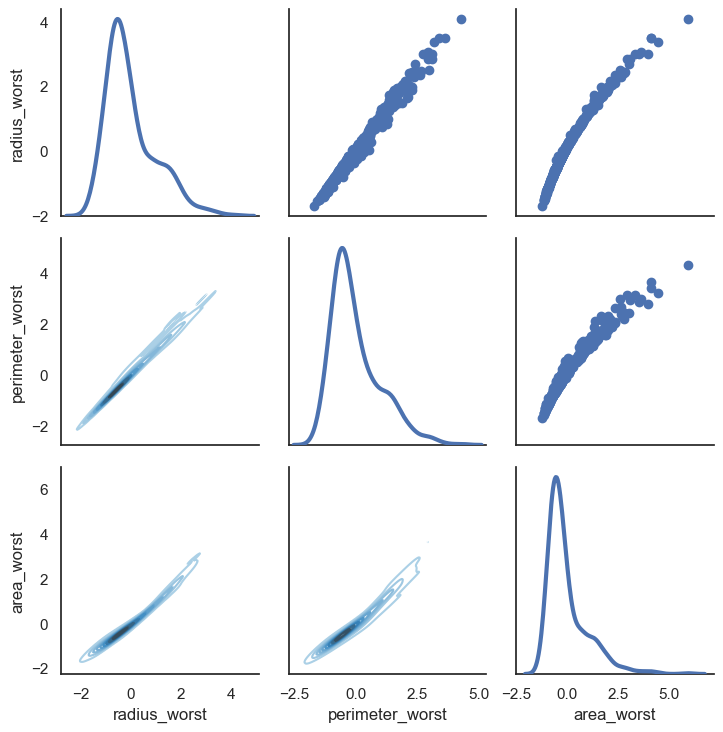

In [102]:
sns.set(style="white")
df = features_std.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

# Analyse Bivariéé

In [103]:
# Calcul de la matrice de corrélation
matrice_correlation = features_std.corr()
matrice_correlation

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


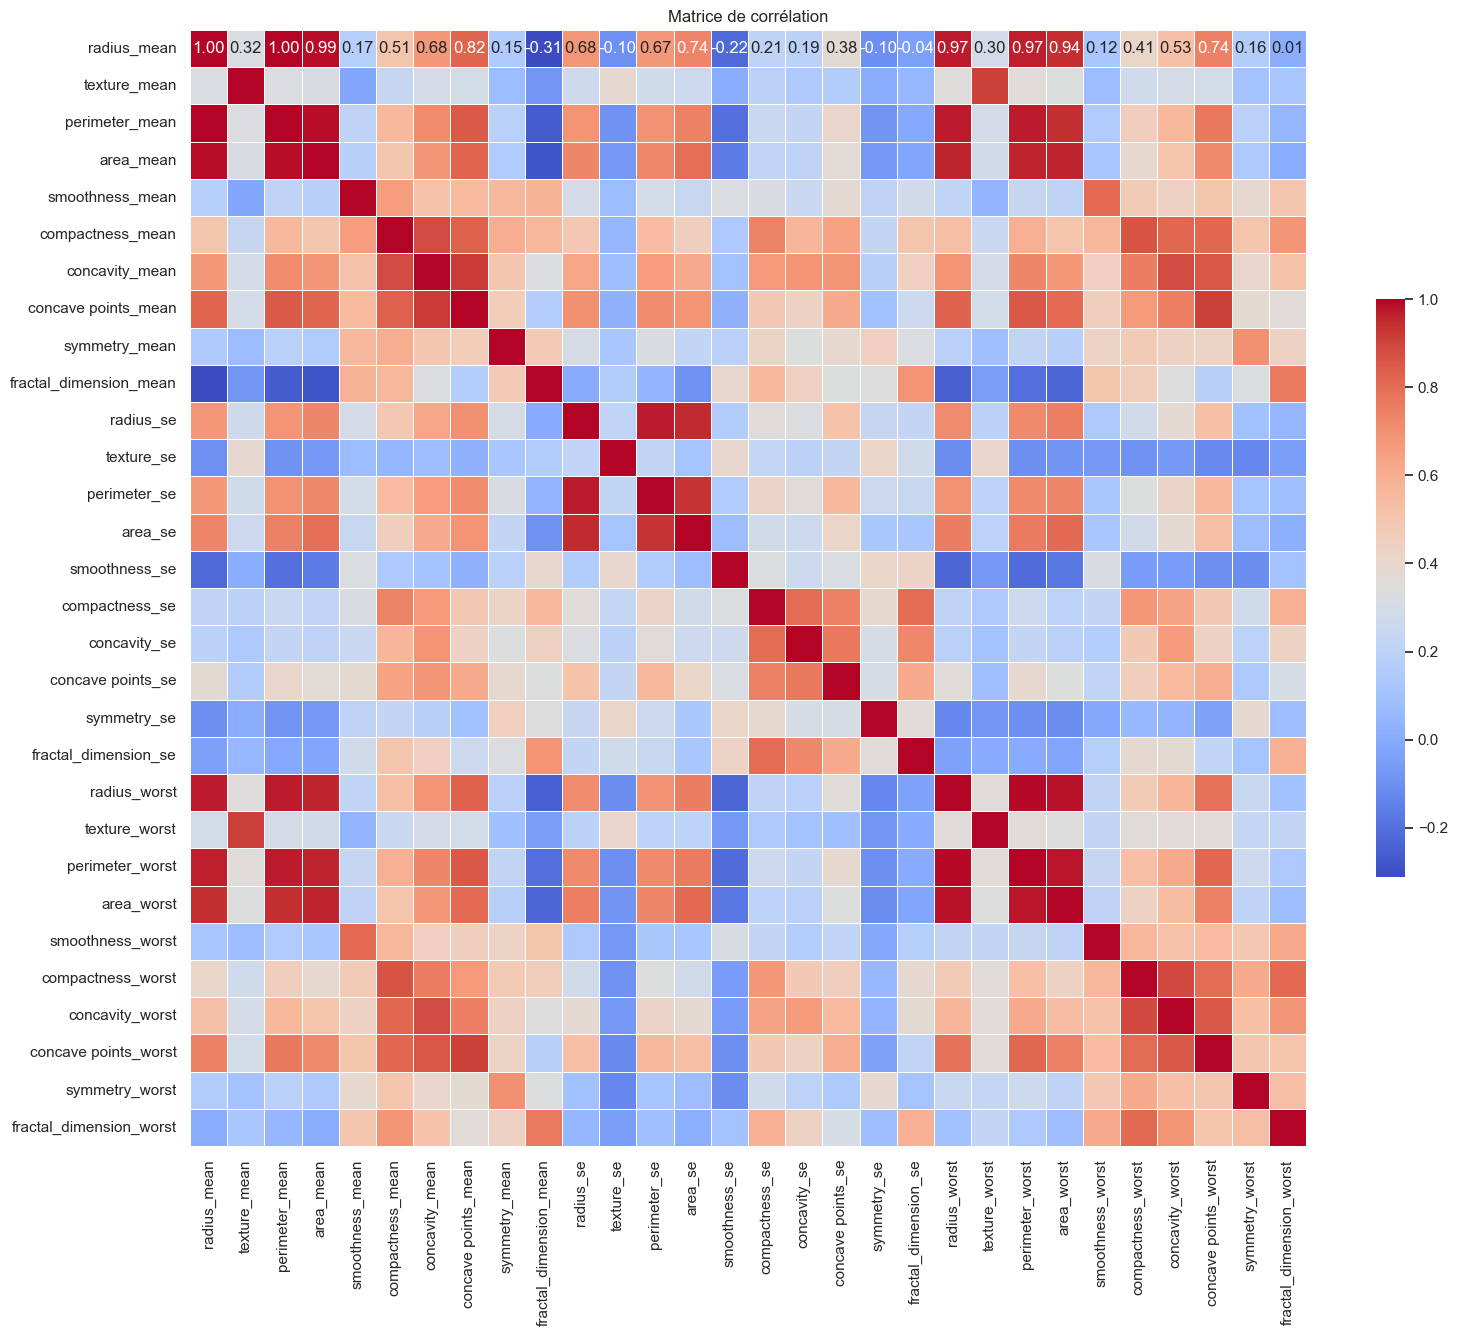

In [104]:
# Configuration de Seaborn
sns.set(style="white")
# Création d'une heatmap pour la matrice de corrélation
plt.figure(figsize=(18, 15))
sns.heatmap(matrice_correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matrice de corrélation')
plt.show()


Corrélations Fortes entre Mesures Géométriques :

Il y a des corrélations très élevées (proches de 1) entre radius_mean, perimeter_mean, et area_mean, ainsi qu'entre leurs équivalents '_worst'. 
===> Cela est attendu car ces mesures sont géométriquement liées (le périmètre et l'aire d'un cercle sont directement liés à son rayon). 

Ces corrélations élevées suggèrent une redondance d'information, ce qui pourrait justifier une réduction de dimensionnalité ou la sélection de caractéristiques pour éviter la multicollinéarité dans les modèles de machine learning.

Corrélations entre Caractéristiques de Texture et Taille : Il existe des corrélations modérées entre les mesures de texture (texture_mean, texture_worst) et les mesures géométriques. Cela peut indiquer une relation entre la texture de la tumeur et sa taille ou sa croissance.

Indicateurs de Concavité et Points Concaves : Les caractéristiques liées à la concavité (concavity_mean, concave points_mean et leurs équivalents '_worst') montrent également de fortes corrélations entre elles et avec les mesures géométriques. 

===> Cela suggère que les tumeurs avec des régions plus concaves ont tendance à être plus grandes et peuvent être plus susceptibles d'être malignes.

Relation entre la Lissité et les Dimensions Fractales : Les mesures de lissité (smoothness_mean, smoothness_worst) et les dimensions fractales (fractal_dimension_mean, fractal_dimension_worst) présentent des corrélations positives modérées avec d'autres caractéristiques, ce qui indique que la complexité de la surface de la tumeur pourrait être liée à d'autres propriétés de la tumeur.

Potentiel pour la Prédiction de Diagnostic : Les caractéristiques qui montrent des corrélations fortes avec de nombreuses autres (par exemple, concave points_worst) pourraient être particulièrement utiles pour prédire le diagnostic (maligne vs bénigne), car elles capturent des informations importantes sur la tumeur.

Implications pour la Modélisation:

Sélection de Caractéristiques : La présence de corrélations élevées suggère que certaines caractéristiques peuvent être redondantes. La sélection de caractéristiques ou l'extraction de caractéristiques (par exemple, via une analyse en composantes principales, PCA) pourrait être bénéfique pour simplifier le modèle sans perdre d'information significative.

Prudence avec la Multicollinéarité : Pour les modèles sensibles à la multicollinéarité, comme la régression linéaire, il peut être nécessaire d'éliminer certaines variables corrélées ou d'utiliser des techniques de régularisation.

Caractéristiques Importantes pour la Classification : Les caractéristiques avec des corrélations fortes à la fois entre elles et avec d'autres variables peuvent jouer un rôle clé dans la distinction entre les tumeurs malignes et bénignes, ce qui mérite une analyse plus approfondie.


# Test dextraction des variables significative sans  ACP
Avant de faire lanalyse alaide de ACP je veux tenter de selectionné quelques variable significatif a partir de cette relation de coorelation et les figure analyser precedement pour mettre en pnplace un modele de  classification

In [105]:
# `matrice_correlation` contient la matrice de corrélation
# Filtrer la matrice de corrélation pour les valeurs supérieures à 0,8
# np.triu pour s'assurer qu'on ne considère que la moitié supérieure de la matrice (pour éviter les doublons)
mask = np.triu(np.ones_like(matrice_correlation, dtype=bool), k=1)
corr_fortes = matrice_correlation.where(mask) > 0.85

# Extraire les paires de corrélations fortes (supérieures à 0,85)
paires_fortes = corr_fortes.stack().reset_index()
paires_fortes.columns = ['Variable1', 'Variable2', 'Correlation']

# Filtrer pour garder uniquement les corrélations > 0.85
paires_fortes = paires_fortes[paires_fortes['Correlation'] > 0.85]

print(paires_fortes)


               Variable1             Variable2  Correlation
2            radius_mean        perimeter_mean         True
3            radius_mean             area_mean         True
20           radius_mean          radius_worst         True
22           radius_mean       perimeter_worst         True
23           radius_mean            area_worst         True
51          texture_mean         texture_worst         True
63        perimeter_mean             area_mean         True
67        perimeter_mean   concave points_mean         True
80        perimeter_mean          radius_worst         True
82        perimeter_mean       perimeter_worst         True
83        perimeter_mean            area_worst         True
110            area_mean          radius_worst         True
112            area_mean       perimeter_worst         True
113            area_mean            area_worst         True
156     compactness_mean        concavity_mean         True
175     compactness_mean     compactness

In [106]:
# matrice_correlation = ...
# Convertir la matrice de corrélation en distances
distances = 1 - matrice_correlation.abs()  # Utiliser abs pour traiter les corrélations négatives également
# Convertir le DataFrame en matrice carrée, nécessaire pour `linkage`
distances_condensed = squareform(distances, checks=False)
# Effectuer le clustering hiérarchique
Z = linkage(distances_condensed, 'average')
# Déterminer les clusters avec un seuil de distance (par exemple 0,2 pour des corrélations fortes)
threshold = 0.2
clusters = fcluster(Z, threshold, criterion='distance')
# Associer chaque variable à son cluster
cluster_map = pd.DataFrame({'variable': matrice_correlation.columns, 'cluster': clusters})
# Trier par cluster
cluster_map.sort_values('cluster', inplace=True)
# Pour afficher les groupes de variables fortement corrélées
for cluster_id in sorted(cluster_map['cluster'].unique()):
    print(f"Cluster {cluster_id}:")
    members = cluster_map['variable'][cluster_map['cluster'] == cluster_id].tolist()
    print(members)


Cluster 1:
['smoothness_se']
Cluster 2:
['symmetry_se']
Cluster 3:
['texture_se']
Cluster 4:
['texture_mean', 'texture_worst']
Cluster 5:
['symmetry_mean']
Cluster 6:
['symmetry_worst']
Cluster 7:
['smoothness_worst', 'smoothness_mean']
Cluster 8:
['fractal_dimension_mean']
Cluster 9:
['fractal_dimension_worst']
Cluster 10:
['compactness_se', 'fractal_dimension_se']
Cluster 11:
['concavity_se']
Cluster 12:
['concave points_se']
Cluster 13:
['concavity_worst', 'compactness_worst']
Cluster 14:
['concave points_mean', 'concave points_worst', 'concavity_mean', 'compactness_mean']
Cluster 15:
['perimeter_mean', 'area_worst', 'radius_worst', 'area_mean', 'perimeter_worst', 'radius_mean']
Cluster 16:
['radius_se', 'area_se', 'perimeter_se']


* radius_mean, perimeter_mean and area_mean : JE  SELECTE  area_mean EN SE BASANT SUR LA FIGURE  de swarm plots area_mean ===>les donnees sont plus aumoins meiux separé 

* compactness_mean, concavity_mean and concave points_mean sont  bien cooreler entre eux : ====> choix : concavity_mean

* texture_mean and texture_worst sont  bien cooreler entre eux : ======> choix texture_mean

* radius_se, perimeter_se et  area_se sont  bien cooreler entre eux : ======> choix : area_se.

* compactness_se, concavity_se et concave points_se sont  bien cooreler entre eux : ======> choix  concavity_se.

* radius_worst, perimeter_worst et  area_worst sont  bien cooreler entre eux : ======> choix : area_worst

* compactness_worst, concavity_worst et concave points_worst sont  bien cooreler entre eux : ======> choix : concavity_worst

* area_worst and area_mean sont  bien cooreler entre eux : ======> choix :  area_mean.




In [107]:
features_std.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [108]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
Z = features_std.drop(drop_list,axis = 1 )        # on crer une nouvelle liste X 
Z.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,-2.071512,0.983510,1.567087,2.650542,2.215566,2.253764,-0.564768,2.485391,-0.213814,0.723390,1.147747,0.906286,1.306537,2.107672,2.748204,1.935312
1,-0.353322,1.907030,-0.826235,-0.023825,0.001391,-0.867889,-0.875473,0.741749,-0.604819,-0.440393,-0.804742,-0.099356,-0.375282,-0.146620,-0.243675,0.280943
2,0.455786,1.557513,0.941382,1.362280,0.938859,-0.397658,-0.779398,1.180298,-0.296744,0.212889,0.236827,0.293301,0.526944,0.854222,1.151242,0.201214
3,0.253509,-0.763792,3.280667,1.914213,2.864862,4.906602,-0.110312,-0.288125,0.689095,0.818798,4.728520,2.045711,3.391291,1.987839,6.040726,4.930672
4,-1.150804,1.824624,0.280125,1.369806,-0.009552,-0.561956,-0.789549,1.189310,1.481763,0.827742,-0.360775,0.498889,0.220362,0.612640,-0.867590,-0.396751


In [109]:
print(Z.shape)

(569, 16)


<Axes: >

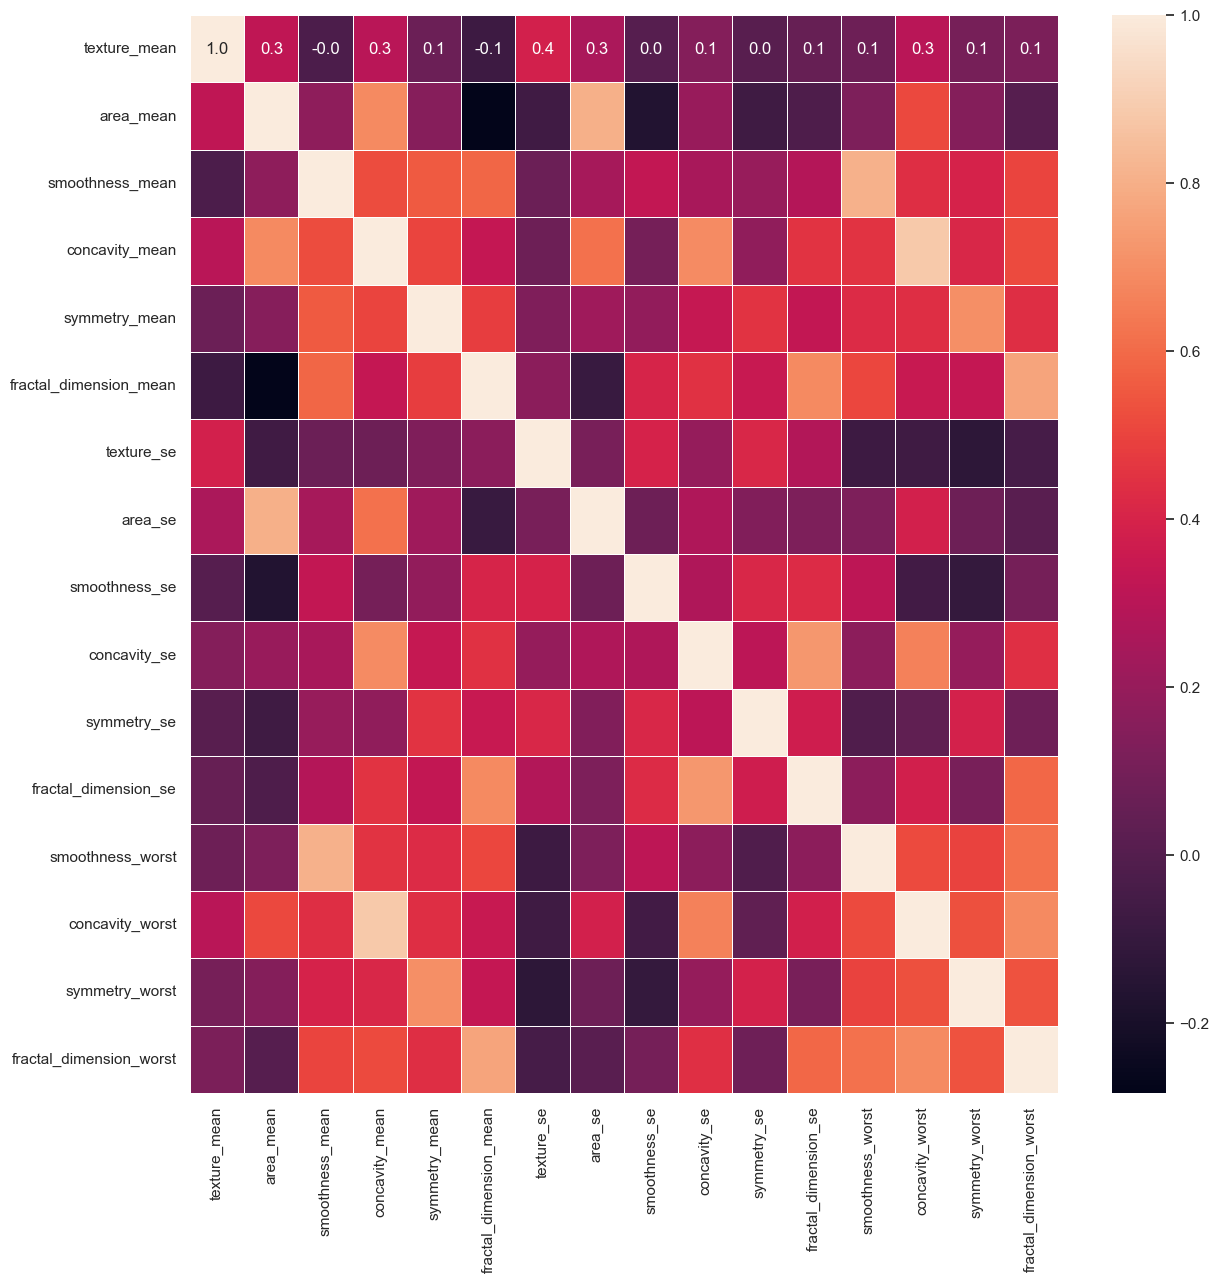

In [110]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(Z.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

je reviens vers les données de base pour appliquer le ACP

# Application ACP

In [111]:
features_std.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


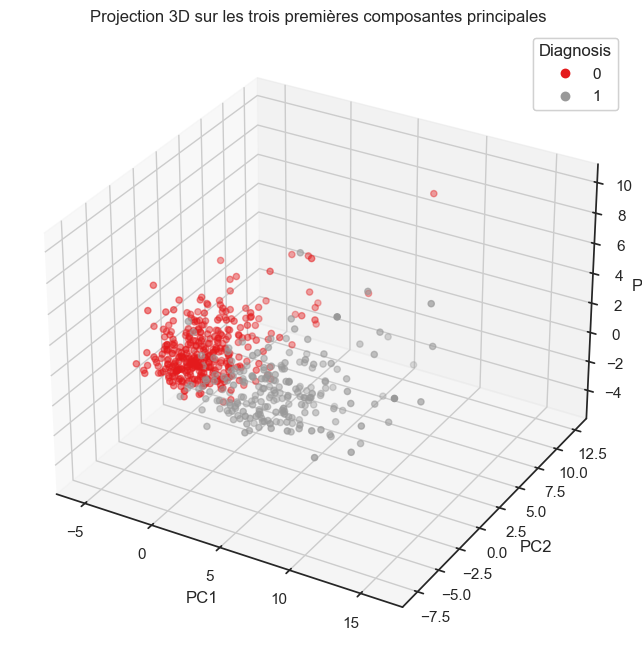

In [113]:
from mpl_toolkits.mplot3d import Axes3D

# Application de l'ACP avec 3 composantes principales pour une visualisation en 3D
pca_3 = PCA(n_components=3)
principales_composantes_3 = pca_3.fit_transform(features_std)
df_pca_3 = pd.DataFrame(data=principales_composantes_3, columns=['PC1', 'PC2', 'PC3'])

# Ajout des étiquettes 'diagnosis' pour la visualisation
df_pca_3['diagnosis'] = label

# Création de la visualisation 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot en 3D avec coloration selon 'diagnosis'
scatter = ax.scatter(df_pca_3['PC1'], df_pca_3['PC2'], df_pca_3['PC3'], 
                     c=pd.Categorical(df_pca_3['diagnosis']).codes, cmap='Set1')

# Légende
legend1 = ax.legend(*scatter.legend_elements(), title="Diagnosis")
ax.add_artist(legend1)

# Titres et labels
ax.set_title('Projection 3D sur les trois premières composantes principales')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


Variance expliquée par chaque composante : [0.44272026 0.18971182]
Variance totale expliquée : 0.6324320765155949


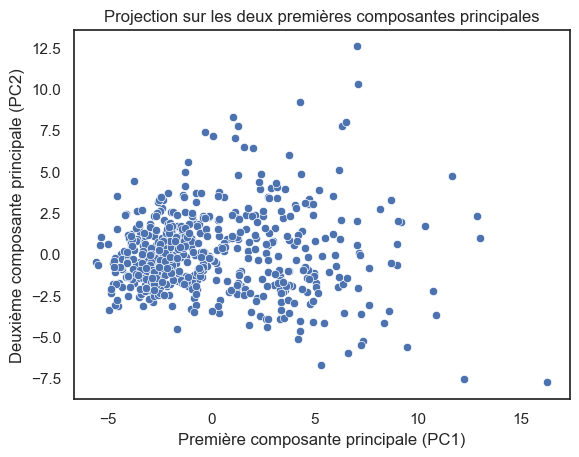

In [114]:
#'colonne_a_supprimer'#features_std= features_std.drop('diagnosis', axis=1) deja fait sur le feataru=res-std
data_standardisee = features_std
# 2. Application de l'ACP
# Choisissez le nombre de composantes principales, par exemple 2 pour la visualisation
pca = PCA(n_components=2)
principales_composantes = pca.fit_transform(features_std)
# Création d'un nouveau DataFrame pour les composantes principales
df_pca = pd.DataFrame(data=principales_composantes, columns=['PC1', 'PC2'])
# 3. Analyse des résultats
print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)
print("Variance totale expliquée :", sum(pca.explained_variance_ratio_))
# Visualisation (optionnel)
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Projection sur les deux premières composantes principales')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.show()


Nombre de composantes pour expliquer 80% de variance : 5
Variance expliquée cumulée par les 5 premières composantes : 0.8473427431680723


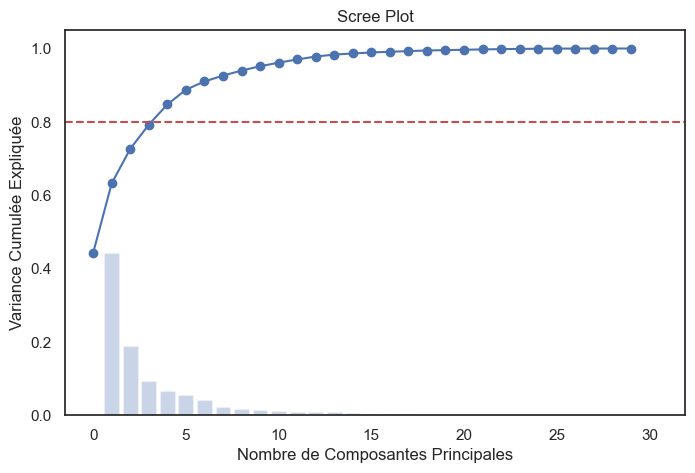

In [115]:
# Appliquer l'ACP en ne spécifiant pas le nombre de composants pour obtenir tous les composants possibles
pca = PCA()
principales_composantes = pca.fit_transform(features_std)
# Calculer la variance cumulée expliquée
variance_cumulee = np.cumsum(pca.explained_variance_ratio_)
variance_expliquee = pca.explained_variance_ratio_
# Trouver le nombre de composantes pour une variance cumulée désirée, par exemple 0.8 pour 80%
nombre_composantes = np.where(variance_cumulee > 0.8)[0][0] + 1
print(f"Nombre de composantes pour expliquer 80% de variance : {nombre_composantes}")
print(f"Variance expliquée cumulée par les {nombre_composantes} premières composantes : {variance_cumulee[nombre_composantes - 1]}")
# afficher  le screen plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(variance_cumulee, marker='o')
plt.xlabel('Nombre de Composantes Principales')
plt.bar(range(1, len(variance_expliquee) + 1), variance_expliquee, alpha=0.3, align='center', label='Variance individuelle expliquée')
plt.ylabel('Variance Cumulée Expliquée')
plt.title('Scree Plot')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.show()


In [116]:
# Application de l'ACP
pca = PCA().fit(features_std)
# Calcul de la variance cumulée expliquée
variance_cumulee = np.cumsum(pca.explained_variance_ratio_)
# Détermination du nombre de composantes nécessaires pour atteindre différents seuils de variance expliquée
seuils = [0.8, 0.9, 0.95,0.99]
n_composantes_pour_seuil = {seuil: np.argmax(variance_cumulee >= seuil) + 1 for seuil in seuils}
print("Nombre de composantes principales nécessaires pour atteindre :")
for seuil, n_composantes in n_composantes_pour_seuil.items():
    print(f" - {seuil*100}% de la variance expliquée: {n_composantes} composantes principales")

Nombre de composantes principales nécessaires pour atteindre :
 - 80.0% de la variance expliquée: 5 composantes principales
 - 90.0% de la variance expliquée: 7 composantes principales
 - 95.0% de la variance expliquée: 10 composantes principales
 - 99.0% de la variance expliquée: 17 composantes principales


In [117]:
# Application de l'ACP 
pca = PCA().fit(features_std)
# nombre de composantes nécessaires pour différents seuils
seuils = [0.8, 0.9, 0.95, 0.99]
n_composantes_pour_seuil = {seuil: np.argmax(np.cumsum(pca.explained_variance_ratio_) >= seuil) + 1 for seuil in seuils}
# Enregistrement des composantes principales pour chaque seuil
for seuil, n_composantes in n_composantes_pour_seuil.items():
    # Appliquer l'ACP avec le nombre de composantes nécessaires pour le seuil donné
    pca_seuil = PCA(n_components=n_composantes)
    composantes_principales = pca_seuil.fit_transform(data_standardisee)
    # Convertir en DataFrame
    df_composantes = pd.DataFrame(composantes_principales, columns=[f'PC{i+1}' for i in range(n_composantes)])
    # Enregistrer dans un fichier CSV
    chemin_fichier = f'composantes_principales_seuil_{int(seuil*100)}.csv'
    df_composantes.to_csv(chemin_fichier, index=False)
    print(f"Composantes principales pour {seuil*100}% de variance expliquée enregistrées dans {chemin_fichier}.")


Composantes principales pour 80.0% de variance expliquée enregistrées dans composantes_principales_seuil_80.csv.
Composantes principales pour 90.0% de variance expliquée enregistrées dans composantes_principales_seuil_90.csv.
Composantes principales pour 95.0% de variance expliquée enregistrées dans composantes_principales_seuil_95.csv.
Composantes principales pour 99.0% de variance expliquée enregistrées dans composantes_principales_seuil_99.csv.


Importation des données apres la selection de nombre de Composants Principale 

In [118]:
chemin_fichier_excel = 'composantes_principales_seuil_90.csv' 
df_composantes = pd.read_csv(chemin_fichier_excel)

In [119]:
df_composantes.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,9.184755,1.946870,-1.122179,3.630536,-1.194060,1.410184,2.157475
1,2.385703,-3.764859,-0.528827,1.117281,0.621228,0.028631,0.013353
2,5.728855,-1.074229,-0.551263,0.911281,-0.176930,0.540976,-0.667576
3,7.116691,10.266556,-3.229947,0.152413,-2.958275,3.050738,1.428641
4,3.931842,-1.946359,1.388545,2.938054,0.546267,-1.225416,-0.935405


In [120]:
label.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

# 5. Modélisation

In [121]:
%who DataFrame

Z	 cluster_map	 corr_fortes	 data	 data2	 data_standardisee	 data_std	 df	 df_composantes	 
df_pca	 df_pca_3	 distances	 features_std	 matrice_correlation	 paires_fortes	 stats_descriptives	 


In [122]:
%who

Axes3D	 LogisticRegression	 PCA	 RandomForestClassifier	 StandardScaler	 Z	 accuracy_score	 ax	 chemin_fichier	 
chemin_fichier_excel	 classification_report	 cluster_id	 cluster_map	 clusters	 col	 composantes_principales	 confusion_matrix	 corr_fortes	 
data	 data2	 data_standardisee	 data_std	 datasets	 df	 df_composantes	 df_pca	 df_pca_3	 
distances	 distances_condensed	 drop_list	 ecart_type	 f	 f1_score	 fcluster	 feature	 features	 
features_std	 fig	 g	 label	 legend1	 linkage	 lire_csv	 list	 mask	 
matrice_correlation	 members	 n_composantes	 n_composantes_pour_seuil	 nombre_composantes	 np	 null_values	 paires_fortes	 palette_contrast	 
palette_custom	 pca	 pca_3	 pca_seuil	 pd	 plt	 principales_composantes	 principales_composantes_3	 px	 
scatter	 seuil	 seuils	 sns	 squareform	 standarliser	 stats_descriptives	 threshold	 tic	 
time	 toc	 train_test_split	 variance	 variance_cumulee	 variance_expliquee	 warnings	 y	 


In [123]:
y= label

In [124]:
y.head

<bound method NDFrame.head of 0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object>

In [125]:
features_std.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [126]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# data_standardisee` est votre dataset déjà standardisé
# et `y` sont les étiquettes
# 1. Configurer l'ACP avec 7 composantes
pca = PCA(n_components=7)
# 2. Appliquer l'ACP
X_pca = pca.fit_transform(data_standardisee)
# 3. Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
# Création du modèle RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Entraînement du modèle sur l'ensemble d'entraînement transformé par l'ACP
rf_model.fit(X_train, y_train)
# À ce stade, votre modèle `rf_model` est entraîné sur les données avec 7 composantes principales
# et vous pouvez l'utiliser pour faire des prédictions

RandomForestClassifier(random_state=42)

Séparation des données en ensembles d'entraînement et de test

In [127]:
#X_train, X_test, y_train, y_test = train_test_split(df_composantes, y, test_size=0.2, random_state=42)

In [128]:
print (X_train.shape)

(455, 7)


In [129]:
print (X_test.shape)

(114, 7)


In [130]:
print (y_train.shape)

(455,)


In [131]:
print (y_test.shape)

(114,)


---

## Modèle RandomForest

In [132]:
# Création du modèle RandomForest
#rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Entraînement du modèle sur l'ensemble d'entraînement
#rf_model.fit(X_train, y_train)
# Prédiction sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

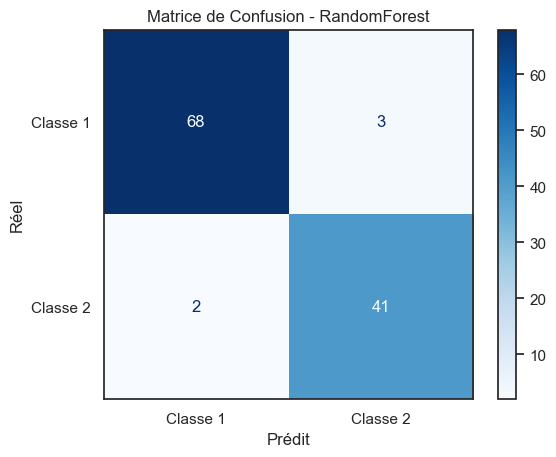

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Calcul de la matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# Affichage de la matrice de confusion
ConfusionMatrixDisplay(conf_matrix_rf, display_labels=['Classe 1', 'Classe 2']).plot(cmap='Blues')
plt.title('Matrice de Confusion - RandomForest')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


In [134]:
# Calcul de la précision
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Précision du modèle RandomForest :", accuracy_rf)
# Rapport de classification détaillé
classification_report_rf = classification_report(y_test, y_pred_rf)
print("Rapport de classification du modèle RandomForest :\n", classification_report_rf)


Précision du modèle RandomForest : 0.956140350877193
Rapport de classification du modèle RandomForest :
               precision    recall  f1-score   support

           B       0.97      0.96      0.96        71
           M       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [135]:
from sklearn.metrics import confusion_matrix
#e y_test et y_pred_rf 
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# afficher la matrice de confusion
print(conf_matrix_rf)


[[68  3]
 [ 2 41]]


In [136]:
# Afficher l'importance des caractéristiques
feature_importances = rf_model.feature_importances_
features = df_composantes.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Tri des caractéristiques par importance
importances_df = importances_df.sort_values('Importance', ascending=False)
print(importances_df)


  Feature  Importance
0     PC1    0.563123
2     PC3    0.131967
1     PC2    0.109733
4     PC5    0.053384
3     PC4    0.051544
6     PC7    0.050695
5     PC6    0.039553


In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#Optimisation des hyperparamètres  "modèle GridSearchCV"
# Définition du modèle
model = RandomForestClassifier(random_state=42)
# Grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Configuration de la recherche par grille
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Exécution de la recherche par grille
grid_search.fit(X_train, y_train)
# Affichage des meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)
# Utilisation du meilleur modèle trouvé
best_model = grid_search.best_estimator_
# Évaluation du meilleur modèle
y_pred_best = best_model.predict(X_test)
print("Précision du meilleur modèle :", accuracy_score(y_test, y_pred_best))

Meilleurs paramètres : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Précision du meilleur modèle : 0.956140350877193


Les résultats de l'optimisation des hyperparamètres pour mon modèle RandomForest montrent que la meilleure combinaison trouvée est :

max_depth: None (pas de limite sur la profondeur de l'arbre, permettant aux arbres de croître jusqu'à ce que toutes les feuilles soient pures ou contiennent moins d'échantillons que min_samples_split)

min_samples_leaf: 1 (le nœud feuille doit contenir au minimum 1 échantillon)

min_samples_split: 2 (un nœud doit avoir au minimum 2 échantillons pour être divisé)

n_estimators: 200 (utilisation de 200 arbres dans la forêt)

La précision du modèle avec ces hyperparamètres est de 95.61% (0.956140350877193 arrondi à 95.61), ce qui est une performance très bonne.

Que signifient ces paramètres et cette performance ?

max_depth: None
Cela signifie que les arbres peuvent croître autant que nécessaire pour bien classifier les échantillons, ce qui peut parfois conduire à un sur-apprentissage, mais dans mon cas, cela semble fonctionner bien car la précision est élevée.

min_samples_leaf: 1
Un faible nombre pour min_samples_leaf peut conduire à une plus grande flexibilité du modèle et à un risque de sur-apprentissage. Cependant, étant donné que la performance est élevée, il semble que cela ne pose pas de problème dans votre situation.

min_samples_split: 2
Cela permet aux arbres de se diviser facilement, augmentant la complexité du modèle, mais encore une fois, la haute précision indique que cela n'a pas conduit à un sur-apprentissage excessif dans votre cas.

n_estimators: 200
Avoir plus d'arbres dans la forêt peut améliorer la précision du modèle jusqu'à un certain point. 200 arbres semblent être un bon nombre pour mon modèle, contribuant à une bonne stabilité et performance.

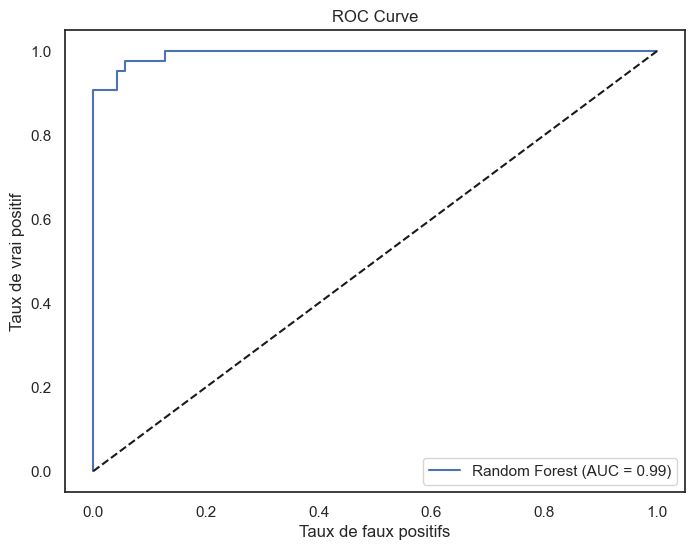

In [138]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Obtenir les probabilités de la classe positive ( la classe 'M' pour malin)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Prédictions de probabilité pour la classe positive
# Calculer les taux de vrais positifs (TPR) et faux positifs (FPR)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf, pos_label='M')
# Calculer l'AUC (Area Under the Curve)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Ligne diagonale pour la performance au hasard
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positif')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

La courbe se rapproche fortement du coin supérieur gauche, ce qui indique une performance élevée du modèle.
L'AUC (Area Under the Curve) est de 0.99, ce qui est très proche de 1. 

ce modèle a une excellente capacité à distinguer entre les classes positives (malin) et négatives (bénin). Une AUC de 1 représente un modèle parfait, tandis qu'une AUC de 0.5 indiquerait une performance équivalente à une sélection aléatoire.
La ligne en pointillé représente la performance d'un modèle aléatoire. Une courbe ROC qui se trouve bien au-dessus de cette ligne indique que le modèle est significativement meilleur que le hasard.

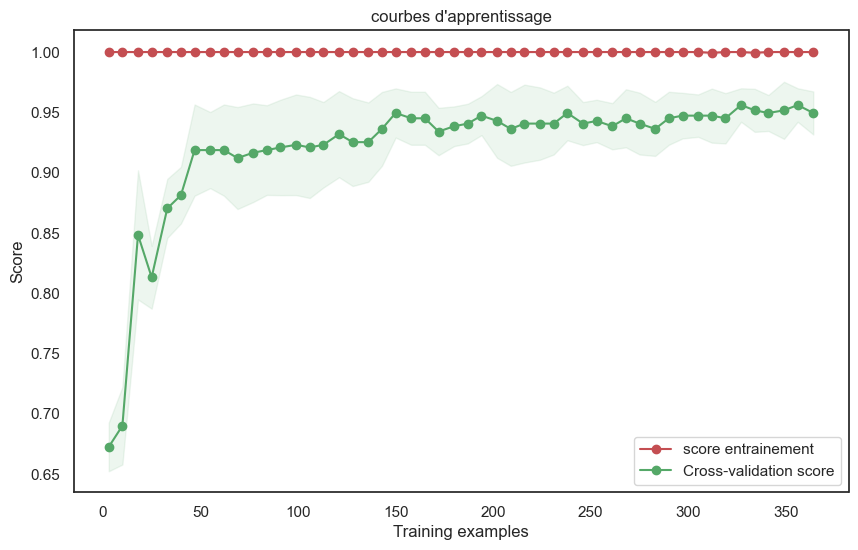

In [139]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Choisir un modèle pour lequel vous souhaitez tracer la courbe d'apprentissage
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Définir les tailles des ensembles d'entraînement
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.01, 1.0, 50),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculer la moyenne et l'écart-type des scores d'entraînement et de validation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Tracer les courbes d'apprentissage
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='score entrainement')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title("courbes d'apprentissage")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


Le score (ligne rouge) commence très haut et reste constant et proche de 1 à mesure que le nombre d'exemples d'entraînement augmente. Cela suggère que le modèle est capable de bien s'adapter aux données d'entraînement à travers toute la gamme des tailles d'entraînement.

Le score de validation croisée (ligne verte) commence plus bas pour les petits ensembles d'entraînement mais augmente rapidement et se stabilise autour d'un score légèrement inférieur à celui du score d'entraînement, bien qu'il y ait toujours un écart entre les deux. Cela indique que le modèle généralise également bien, mais pas aussi parfaitement qu'il s'adapte aux données d'entraînement.

L'écart entre les scores d'entraînement et de validation suggère qu'il pourrait y avoir un léger surajustement, car le modèle performe mieux sur les données d'entraînement que sur les données non vues. Cependant, l'écart n'est pas très grand, ce qui signifie que le surajustement n'est pas sévère.

Il est également important de noter que la performance du modèle sur les données de validation est très élevée (au-dessus de 0.9), ce qui est généralement un très bon signe.

Pour adresser l'écart entre l'entraînement et la validaon peut isaer :

Collecter plus de données, si po modèle.
Réduire la complexité du modèle, en ajustant les hyperparamètres pour contrôler la profondeur de l'arbre ou en augmentant le nombre minimum d'échantillons requis pour effectuer une division dans les arbres de ralisation.
La courbe d'apprentissage semble indiquer que l'ajout de plus de données d'entraînement ne serait pas très bénéfique, car les performances sur l'ensemble de validation se sont stabilisées. Cela pourrait être un signe que le modèle a déjà appris autant qu'il le peut sur la structure du problème à partir des données fournies.

---

 ## Déploiement du Modèle

In [140]:
import joblib
# Enregistrement de l'objet ACP
joblib.dump(pca, 'pca_model.pkl')
# Enregistrement du modèle RandomForest
joblib.dump(rf_model, 'rf_model.pkl')
#joblib.dump(rf_model, 'random_forest_model.joblib')

['rf_model.pkl']

In [141]:
pip show scikit-learn


Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\tarak\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


---

# Test des Autres Modèle

### Support Vector Machine (SVM)

In [101]:
from sklearn.svm import SVC
# Création et entraînement du modèle SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
# Évaluation du modèle
y_pred_svm = svm_model.predict(X_test)
print("Précision SVM :", accuracy_score(y_test, y_pred_svm))

Précision SVM : 0.9824561403508771


In [102]:
# les vecteurs de support
support_vectors = svm_model.support_vectors_
print(support_vectors)


[[-0.50029759  0.10663763 -1.02784354 -0.3046167   0.13899892 -0.7441295
  -1.06685204]
 [ 1.2584973   1.01468425 -0.08052203  2.04953154  0.13739909  0.84229933
  -0.17366567]
 [-1.29978604 -1.81981406  0.37297932 -1.84654419  0.1994517   0.76508132
  -0.46630196]
 [ 1.98671401  2.31401197  1.23521707  1.76822019  0.1438695   0.13347862
   0.36512374]
 [ 1.01082308  1.09142931 -0.63214214 -1.75697251  1.04590654  0.42552083
   0.39794481]
 [-1.56610099 -1.20737085 -0.36883456 -1.47433156  0.17259864  0.54480464
  -0.68387739]
 [-1.4736233  -1.58969544  0.31971015 -0.79812986  0.15791846 -0.43768112
  -1.04291348]
 [ 0.29505357  0.22673553 -1.08845886  0.94658981  0.7284542   0.57950087
   0.10832676]
 [-0.75094226 -3.06794919  1.44790768 -0.95258767  0.89114451  1.29609609
  -0.22139807]
 [-2.37134219 -1.68009793  0.38419009 -3.01407652 -0.03821342  0.06875264
  -0.4148696 ]
 [-0.41746954 -0.80786573 -1.0923303  -0.0896509   0.25684335  0.24537342
  -0.25327779]
 [-0.77892982 -2.12247

In [103]:
# Nombre total de vecteurs de support
n_support_total = svm_model.n_support_.sum()
print(f"Nombre total de vecteurs de support : {n_support_total}")
# Nombre de vecteurs de support par classe
n_support_per_class = svm_model.n_support_
print(f"Nombre de vecteurs de support par classe : {n_support_per_class}")

Nombre total de vecteurs de support : 42
Nombre de vecteurs de support par classe : [23 19]


In [104]:
from sklearn.model_selection import cross_val_score
# SVM avec noyau linéaire
svm_model = SVC(kernel='linear')
# Application de la validation croisée k-fold
scores = cross_val_score(svm_model, X_train, y_train, cv=5)  # cv est le nombre de folds
print(f"Précision en validation croisée: {scores.mean():.2f} ± {scores.std():.2f}")


Précision en validation croisée: 0.97 ± 0.02


la validation croisée k-fold sur votre modèle SVM avec un noyau linéaire,

utilisant 5 folds. La précision obtenue en validation croisée est de 0.97 (ou 97%) avec un écart-type de 0.02 (ou 2%). 

Interprétation de la précision en validation croisée

Une précision moyenne de 97% indique que le modèle est très performant sur l'ensemble d'apprentissage. Cela suggère que le modèle SVM, avec la configuration linéaire spécifiée, est bien adapté aux données et capable de généraliser efficacement à partir des différentes parties de l'ensemble de données.

Faible écart-type : Un écart-type de 2% montre que la performance du modèle est stable à travers les différents folds. 
Une faible variation signifie que le modèle est fiable et a une performance consistante indépendamment de la portion spécifique de données utilisée pour l'entraînement ou le test dans le processus de validation croisée.

La stabilité du modèle à travers les différents folds de la validation croisée est un bon indicateur de sa robustesse, réduisant les risques de surajustement (overfitting).

les résultats de la validation croisée indiquent que votre modèle SVM actuel est à la fois performant et stable, ce qui est idéal pour une application pratique.

### Régression logistique

In [107]:
from sklearn.linear_model import LogisticRegression
# Création et entraînement du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
# Évaluation du modèle
y_pred_logistic = logistic_model.predict(X_test)
print("Précision Régression Logistique :", accuracy_score(y_test, y_pred_logistic))


Précision Régression Logistique : 0.9824561403508771


In [114]:
from sklearn.metrics import confusion_matrix
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Matrice de confusion :")
print(conf_matrix)
# Extraction des valeurs TP, TN, FP, FN
tn, fp, fn, tp = conf_matrix.ravel()
print(f"Vrai Positif (TP) : {tp}")
print(f"Vrai Négatif (TN) : {tn}")
print(f"Faux Positif (FP) : {fp}")
print(f"Faux Négatif (FN) : {fn}")

Matrice de confusion :
[[70  1]
 [ 1 42]]
Vrai Positif (TP) : 42
Vrai Négatif (TN) : 70
Faux Positif (FP) : 1
Faux Négatif (FN) : 1


In [117]:
# Probabilités pour la classe positive
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1] 

In [119]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logistic, pos_label='M')

In [120]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_proba_logistic)

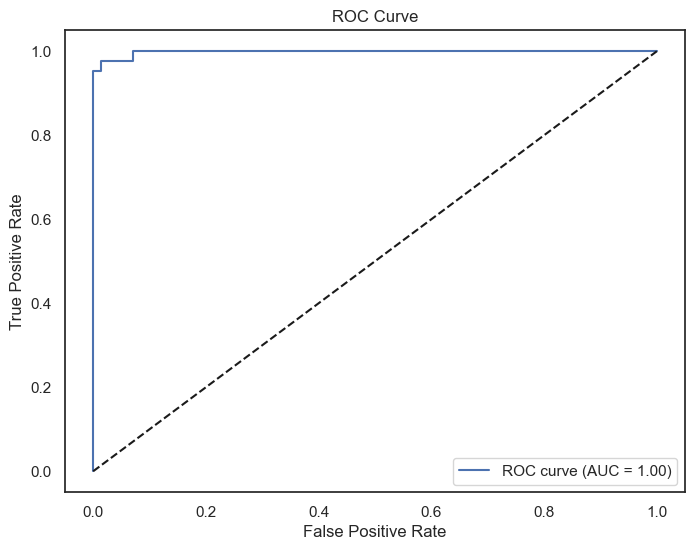

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # ligne de référence pour une prédiction aléatoire
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


cette courbe de indique un AUC (Area Under the Curve) parfaite de 1.00, ce qui signifie que votre modèle de régression logistique a une performance exceptionnelle sur les données testées, avec une capacité parfaite de distinguer entre les classes bénignes ('B') et malignes ('M').

Données très bien séparables : le  modèle pourrait être sur un ensemble de données où les classes sont linéairement séparables d'une manière qui est presque parfaite.
Surajustement : Le modèle pourrait être trop bien ajusté aux données d'entraînement, au point qu'il a capturé du bruit qui n'est pas généralisable. 
C'est moins probable avec la régression logistique et les données de test, mais cela reste une considération.
Taille de l'ensemble de test : si l'ensemble de test est très petit, il pourrait ne pas bien représenter la difficulté de la tâche de classification.
Examinant  ces résultats avec une validation croisée sur l'ensemble des données pour s'assurer que la performance est consistante et fiable.



In [124]:
from sklearn.model_selection import cross_val_score
# Initialisation du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000)
# Application de la validation croisée
# Remarque : utilisez df_composantes et y, qui représentent l'ensemble des données et des étiquettes
scores = cross_val_score(logistic_model, df_composantes, y, cv=5, scoring='accuracy')
# Impression des résultats
print("Précision pour chaque fold:")
print(scores)
print(f'Précision moyenne: {scores.mean():.2f}')
print(f'Écart-type de la précision: {scores.std():.2f}')

Précision pour chaque fold:
[0.97368421 0.95614035 0.97368421 0.97368421 0.98230088]
Précision moyenne: 0.97
Écart-type de la précision: 0.01


Les résultats de la  validation croisée pour le modèle de régression logistique sont très bons. J’ai obtenu des précisions élevées dans tous les 5 folds de la validation croisée, avec une précision moyenne de 0.97 (97%) et un écart-type très faible de 0.01 (1%), ce qui indique que la performance du modèle est à la fois élevée et consistante à travers les différentes sous-parties de vos données.
Que signifient ces résultats ?
Haute précision moyenne : le modèle est très précis en moyenne, ce qui est excellent pour la plupart des applications de classification.
Faible écart-type : La faible variation de la précision entre les folds signifie que la performance de ce modèle est stable et qu'il n'est pas trop dépendant d'un sous-ensemble particulier des données.
Implications :
Généralisabilité : Un modèle avec une telle précision moyenne élevée et un faible écart-type est susceptible de bien se généraliser à de nouvelles données non vues.
Robustesse : La robustesse du modèle est indiquée par la cohérence des scores de précision à travers les folds, suggérant qu'il n'y a pas de surajustement significatif aux données spécifiques de l'un des folds.

Analyse d'erreurs : Bien que les scores de précision soient élevés, il est toujours utile d'examiner les erreurs commises par le modèle pour voir s'il y a des modèles ou des types d'instances systématiquement mal classifiés.


In [125]:
from sklearn.metrics import confusion_matrix
# Faites des prédictions avec le modèle sur l'ensemble de données complet
y_pred = logistic_model.fit(df_composantes, y).predict(df_composantes)
# Calculez la matrice de confusion
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[352   5]
 [  7 205]]


# Réseaux de Neurones (Perceptron Multi-Couches)

In [127]:
from sklearn.neural_network import MLPClassifier

# Création et entraînement du modèle MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_model.fit(X_train, y_train)

# Évaluation du modèle
y_pred_mlp = mlp_model.predict(X_test)
print("Précision MLP :", accuracy_score(y_test, y_pred_mlp))


Précision MLP : 0.9649122807017544


modèle de perceptron multicouche (MLP) avec une couche cachée de 100 neurones et un maximum de 1000 itérations sur l'ensemble d'apprentissage X_train et y_train. 

Après l'entraînement, vous avez évalué le modèle sur l'ensemble de test X_test, obtenant une précision de 0.9649122807017544, soit environ 96.49%.


Bien que légèrement inférieure à la régression logistique et au SVM dans mon  cas, la performance du MLP reste élevée, ce qui souligne son aptitude à bien modéliser les données du WDBC.

En résumé, le MLP s'est révélé être un modèle efficace poumonde classification, avec une précision notable. Cela illustre la capacité des réseaux de neurones à gérer des patterns complexes dans les données, même si dans ce cas, des modèles plus simples comme la régression logistique et le SVM ont montré des performances légèrement meilleures

.

